<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [2]:
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [3]:
# Load the data
house = pd.read_csv('./housing.csv')

In [4]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA and fill in nan

In [5]:
house.shape

(1460, 81)

mu or mean of sale price = 180921.20
sigma or deviation of sale price = 79415.29


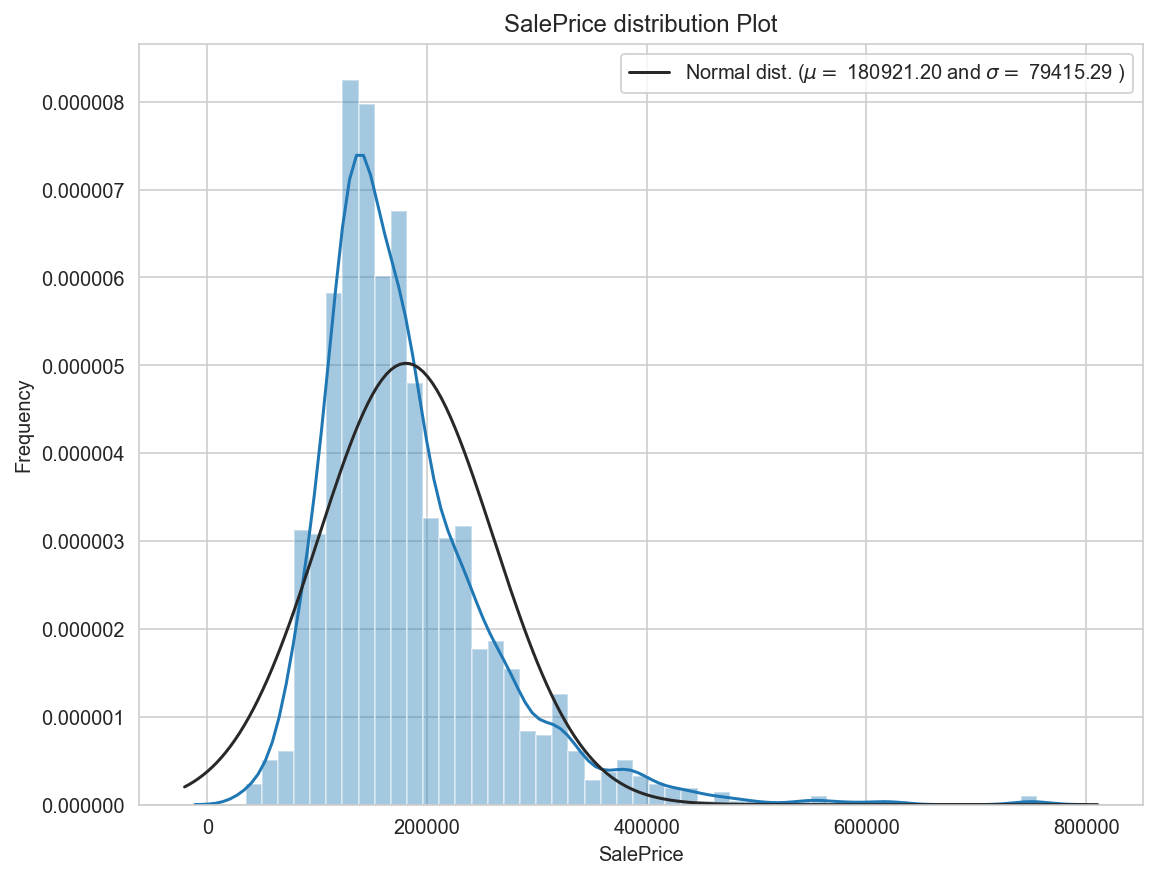

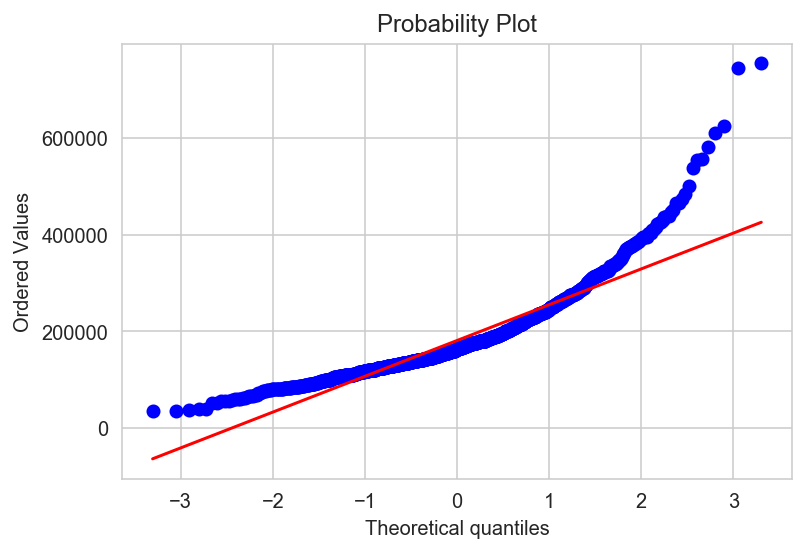

Skewness: 1.882876
Kurtosis: 6.536282


In [6]:
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(9, 7))
sns.distplot(house['SalePrice'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(house['SalePrice'])
print( 'mu or mean of sale price = {:.2f}'.format(mu))
print( 'sigma or deviation of sale price = {:.2f}'.format(sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'
            .format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution Plot')

fig = plt.figure()
res = stats.probplot(house['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % house['SalePrice'].skew())
print("Kurtosis: %f" % house['SalePrice'].kurt())

Sale Price of the houses distribution curve is skewed to the right.
Majority of the Sale Price falls between 80,000 to 300,000.
With a right skewed distribution chart of the house sale price, this dataset may likely be able to yield insights into what key features that improve the sale price even though there maybe outliers.
Kutorosis is slightly platykurtic (flatness), which means the sale price of the house has a slightly broader range of prices.

Text(0.5,1,'Log SalePrice distribution Plot')

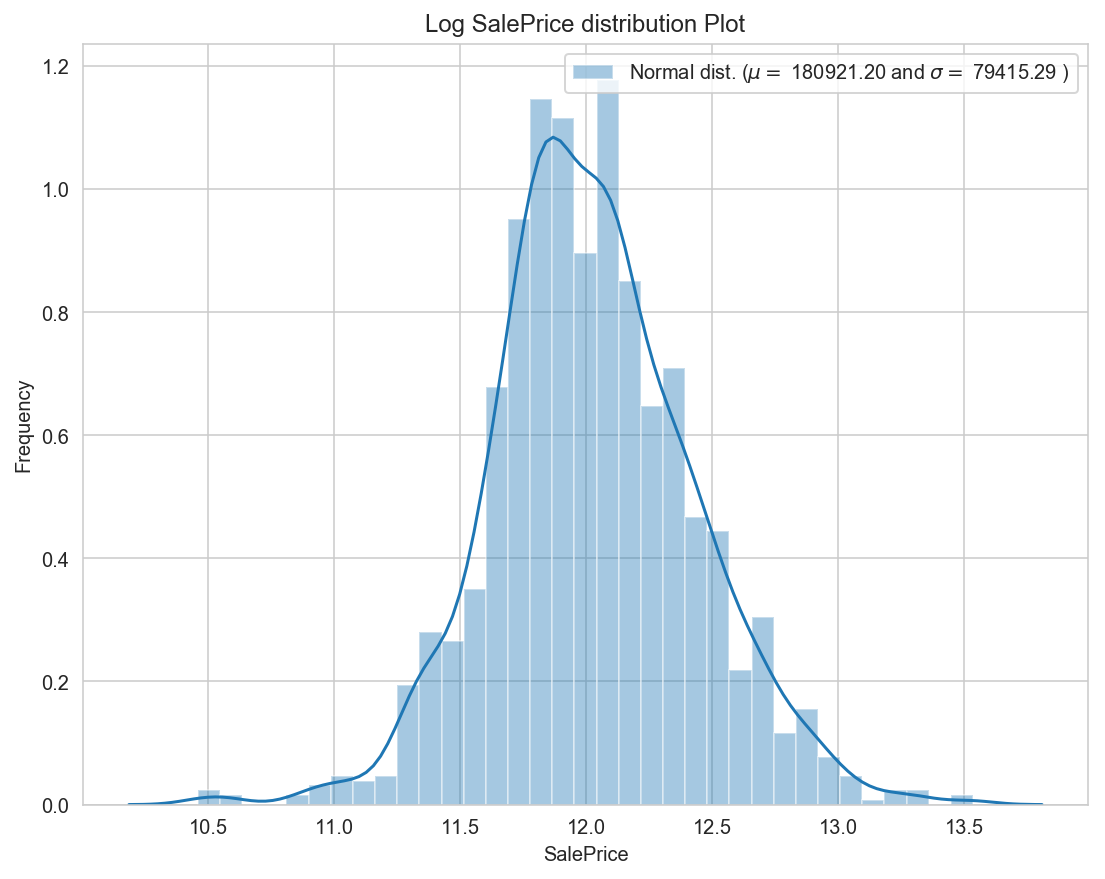

In [7]:
fig = plt.figure(figsize=(9, 7))
log_house_saleprice = np.log(house['SalePrice'])
sns.distplot(log_house_saleprice)

(mu, sigma) = norm.fit(house['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'
            .format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Log SalePrice distribution Plot')

In [8]:
house.SalePrice.nunique()

663

In [9]:
house.SalePrice.unique()

array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000,
       129900, 118000, 129500, 345000, 144000, 279500, 157000, 132000,
       149000,  90000, 159000, 139000, 325300, 139400, 230000, 154000,
       256300, 134800, 306000, 207500,  68500,  40000, 149350, 179900,
       165500, 277500, 309000, 145000, 153000, 109000,  82000, 160000,
       170000, 130250, 141000, 319900, 239686, 249700, 113000, 127000,
       177000, 114500, 110000, 385000, 130000, 180500, 172500, 196500,
       438780, 124900, 158000, 101000, 202500, 219500, 317000, 180000,
       226000,  80000, 225000, 244000, 185000, 144900, 107400,  91000,
       135750, 136500, 193500, 153500, 245000, 126500, 168500, 260000,
       174000, 164500,  85000, 123600, 109900,  98600, 163500, 133900,
       204750, 214000,  94750,  83000, 128950, 205000, 178000, 118964,
       198900, 169500, 100000, 115000, 190000, 136900, 383970, 217000,
       259500, 176000, 155000, 320000, 163990, 136000, 153900, 181000,
      

Overall, the values in sale price looks fine, there maybe outliers but it seems there isn't any significant values that may affect the results significantly. Now, onto exploring other key features that may produce insights.

In [10]:
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [11]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

There are a number of features that have a significant amount of nan values that
need to be addressed and it is an opportunity to understand what the data is telling us.
Quite possibly the house may not that particular feature and we can use that to explore,
if the feature is an important feature that will improve on the house sale price

In [12]:
for i in house:
    print(i, house[i].nunique())

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 110
LotArea 1073
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
MasVnrArea 327
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinSF1 637
BsmtFinType2 6
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 5
GarageType 6
GarageYrBlt 97
GarageFinish 3
GarageCars 5
GarageArea 441
GarageQual 5
GarageCond 5
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
PoolQC 3
Fence 4
MiscFeature 4
MiscV

In [13]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
type_house = []
for i in house:
#     print(i, house[i].nunique())
    type_house.append([i, house[i].nunique()])
print(type_house)

[['Id', 1460], ['MSSubClass', 15], ['MSZoning', 5], ['LotFrontage', 110], ['LotArea', 1073], ['Street', 2], ['Alley', 2], ['LotShape', 4], ['LandContour', 4], ['Utilities', 2], ['LotConfig', 5], ['LandSlope', 3], ['Neighborhood', 25], ['Condition1', 9], ['Condition2', 8], ['BldgType', 5], ['HouseStyle', 8], ['OverallQual', 10], ['OverallCond', 9], ['YearBuilt', 112], ['YearRemodAdd', 61], ['RoofStyle', 6], ['RoofMatl', 8], ['Exterior1st', 15], ['Exterior2nd', 16], ['MasVnrType', 4], ['MasVnrArea', 327], ['ExterQual', 4], ['ExterCond', 5], ['Foundation', 6], ['BsmtQual', 4], ['BsmtCond', 4], ['BsmtExposure', 4], ['BsmtFinType1', 6], ['BsmtFinSF1', 637], ['BsmtFinType2', 6], ['BsmtFinSF2', 144], ['BsmtUnfSF', 780], ['TotalBsmtSF', 721], ['Heating', 6], ['HeatingQC', 5], ['CentralAir', 2], ['Electrical', 5], ['1stFlrSF', 753], ['2ndFlrSF', 417], ['LowQualFinSF', 24], ['GrLivArea', 861], ['BsmtFullBath', 4], ['BsmtHalfBath', 3], ['FullBath', 4], ['HalfBath', 3], ['BedroomAbvGr', 8], ['Kitc

In [15]:
house.YrSold.unique()

array([2008, 2007, 2006, 2009, 2010])

- 13 Columns has null values.
- 10 Columns of null values will be filled with "none"
- 3 columns of null values will be filled with 0
- 3 of these columns of null values are assumptions that the feature do not exist in these houses and thereby "none"
- 9 of these columns of null values do not have the features stated
- 1 column, lotfrontage of null values to be filled with a value based on the lot area using linear regression.

Table of detail works with columns that have nan values
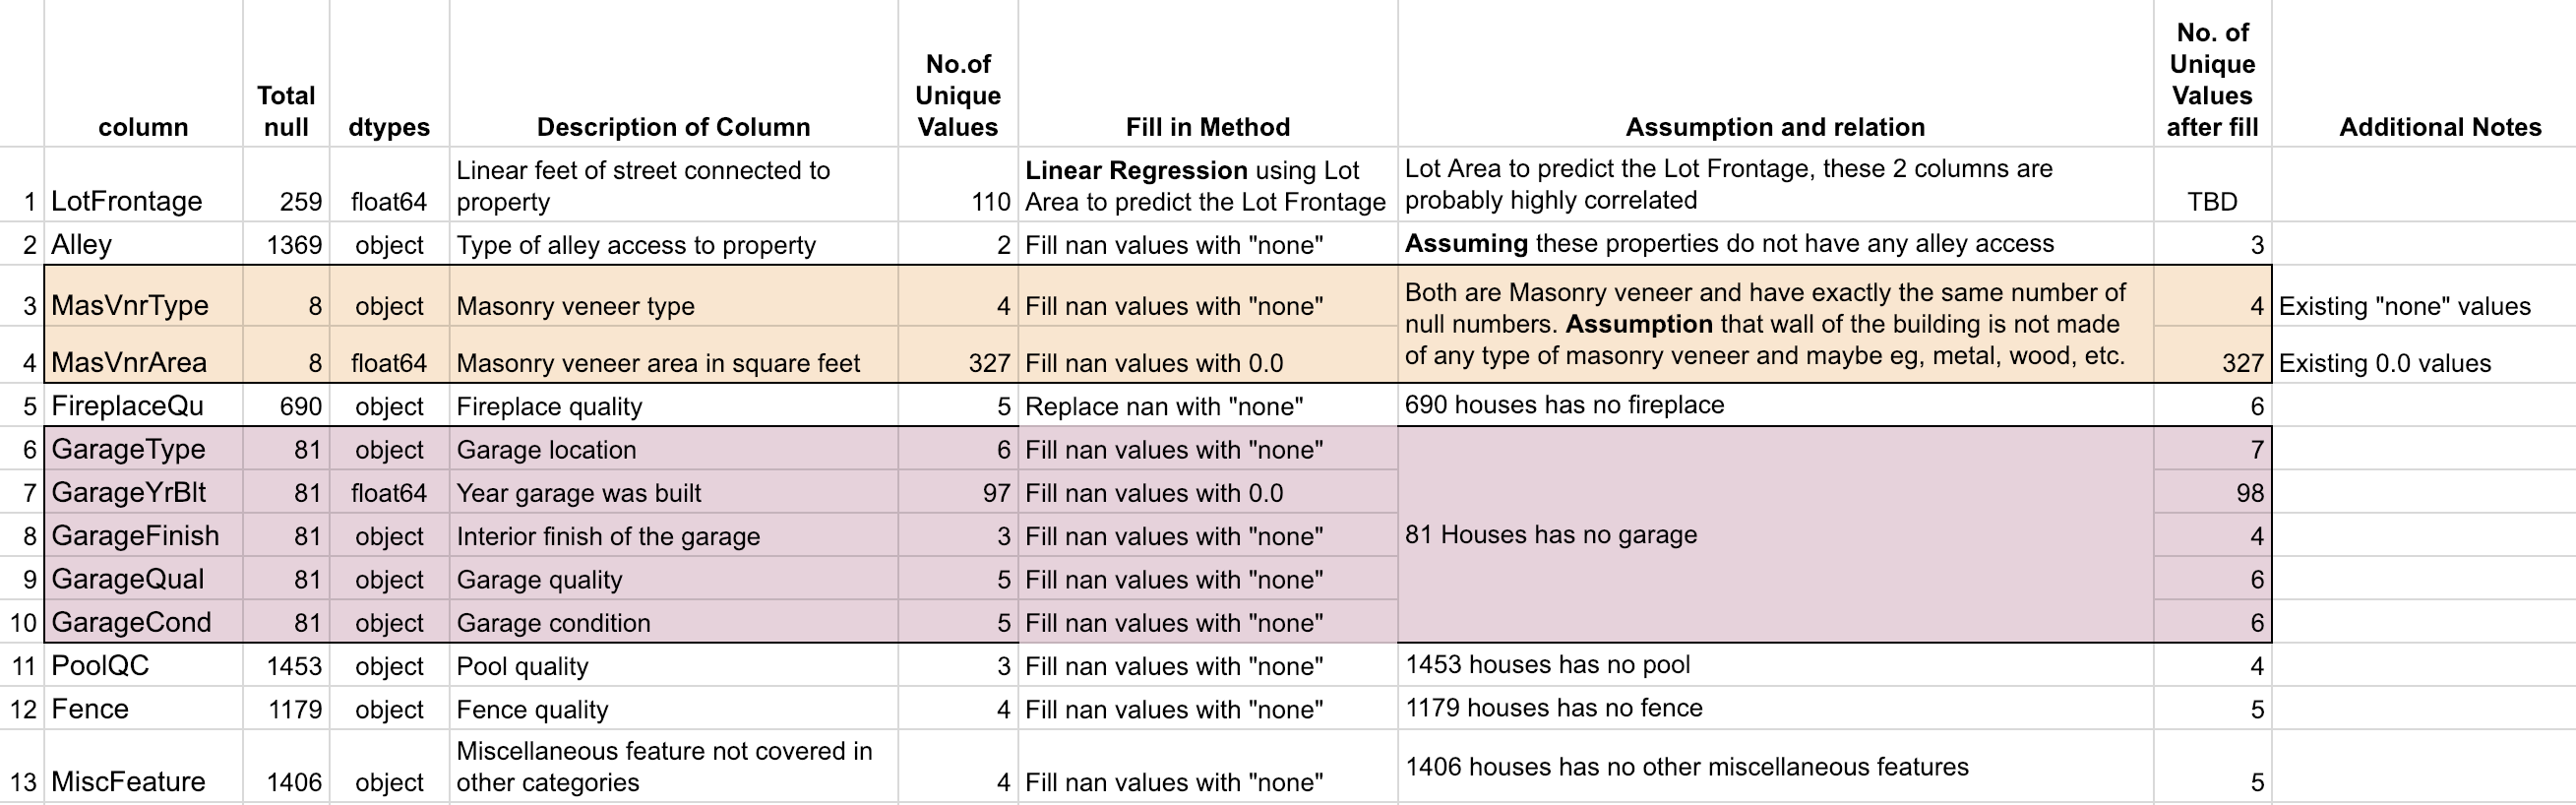

List of columns with null values
- LotFrontage
- Alley
- MasVnrType
- MasVnrArea
- FireplaceQu
- GarageType
- GarageYrBlt
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature

In [16]:
# change all nan to 0 as these columns are float64 type
house['MasVnrArea'] = house['MasVnrArea'].fillna(0)
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(0)

In [17]:
# change all nan to 'none'
house['Alley'] = house['Alley'].fillna('none')
house['MasVnrType'] = house['MasVnrType'].fillna('none')
house['FireplaceQu'] = house['FireplaceQu'].fillna('none')
house['GarageType'] = house['GarageType'].fillna('none')
house['GarageFinish'] = house['GarageFinish'].fillna('none')
house['GarageQual'] = house['GarageQual'].fillna('none')
house['GarageCond'] = house['GarageCond'].fillna('none')
house['PoolQC'] = house['PoolQC'].fillna('none')
house['Fence'] = house['Fence'].fillna('none')
house['MiscFeature'] = house['MiscFeature'].fillna('none')

- Definition of Lot Frontage
- Lot Frontage is directly proportionate to the Lot Area (for a rectauglar lot)
- Going to use existing Lot Frontage and Lot Area to create a coefficient to calculate and fill in nan Lot Frontage

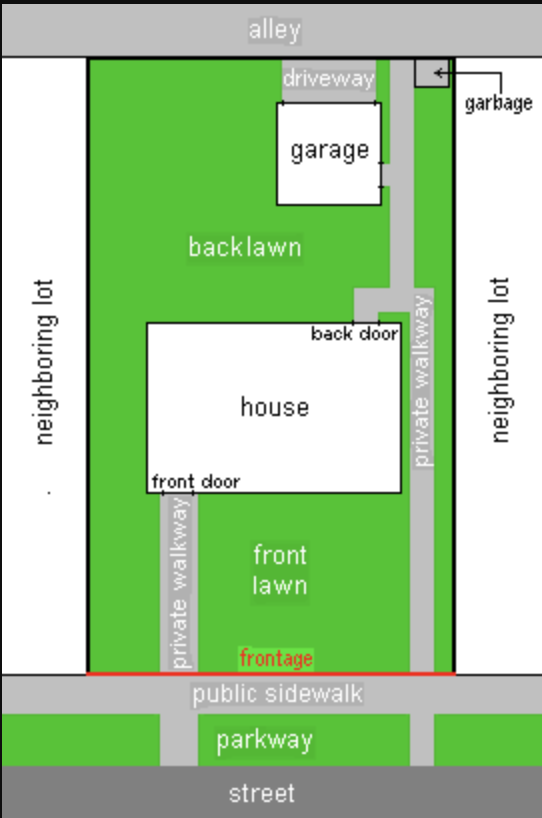

In [18]:
# drop nan and use the existing values to predict the missing values
LotFrontageTest1 = house.dropna(subset=['LotFrontage'])

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [20]:
LotFrontageTest1.shape

(1201, 81)

In [21]:
# using Lot Area to help predict the missing values in Lot Frontage
y_LFT = np.array(LotFrontageTest1.LotFrontage).reshape(1201,1)
X_LFT = np.array(LotFrontageTest1.LotArea).reshape(1201,1)

In [22]:
mod_LFT = regr.fit(X_LFT, y_LFT)
Rsquare_LFT = regr.score(X_LFT, y_LFT)
Intercept_LFT = regr.intercept_
Coeff_LFT = regr.coef_

In [23]:
print("Rsquare_LFT : %f" % Rsquare_LFT)
print("Intercept_LFT : %f" % Intercept_LFT)
print("Coeff_LFT : %f" % Coeff_LFT)

Rsquare_LFT : 0.181557
Intercept_LFT : 57.055042
Coeff_LFT : 0.001306


In [24]:
# LotFrontage column mean and median before fillna
print("Initial Lot Frontage Column Mean :", house['LotFrontage'].mean())
print("Initial Lot Frontage Column Median :", house['LotFrontage'].median())

Initial Lot Frontage Column Mean : 70.04995836802665
Initial Lot Frontage Column Median : 69.0


In [25]:
# Create 259 values for the missing values using Linear Regression
# Fill nan with these values
test_LFT = house.LotArea[house.LotFrontage.isnull()]
predict_LFT = regr.predict(test_LFT.values.reshape(259,1)) #259 nan values
test_LFT.replace(to_replace=test_LFT.values, value=predict_LFT, inplace=True)
house.LotFrontage.fillna(value=test_LFT, inplace=True)

In [26]:
print("After filling nan Lot Frontage Column Mean :", house['LotFrontage'].mean())
print("After filling nan Lot Frontage Column Median :", house['LotFrontage'].median())

After filling nan Lot Frontage Column Mean : 70.78790377740904
After filling nan Lot Frontage Column Median : 70.0


In [27]:
# check if all the nan values has been replaced
house.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

In [28]:
house["LotFrontage"].nunique()
# LotFrontage unique value has increased from 110 to 345

345

In [29]:
for col in house.columns:
    if house[col].dtypes =='object':
        print(house[col].value_counts())
        print('-'*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
--------------------------------------------------
Pave    1454
Grvl       6
Name: Street, dtype: int64
--------------------------------------------------
none    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
--------------------------------------------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
--------------------------------------------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
--------------------------------------------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------------------------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
--------------------------------------------------
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
---------------------------

In [30]:
house['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

From the data_descripion.txt;

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

There are houses in the Commerical zoning and we need to take a look at what are these rows of houses before deciding to drop or keep these rows

In [31]:
filter_MSZoning = house.MSZoning == 'C (all)'
house[filter_MSZoning]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,none,MnPrv,none,0,7,2008,WD,Normal,40000
88,89,50,C (all),105.0,8470,Pave,none,IR1,Lvl,AllPub,...,0,none,MnPrv,none,0,10,2009,ConLD,Abnorml,85000
93,94,190,C (all),60.0,7200,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,11,2007,WD,Normal,133900
495,496,30,C (all),60.0,7879,Pave,none,Reg,Lvl,AllPub,...,0,none,GdWo,none,0,11,2009,WD,Abnorml,34900
557,558,50,C (all),60.0,11040,Pave,none,Reg,Low,AllPub,...,0,none,none,none,0,9,2006,COD,Normal,108000
711,712,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,AllPub,...,0,none,none,none,0,1,2010,WD,Abnorml,102776
812,813,20,C (all),66.0,8712,Grvl,none,Reg,Bnk,AllPub,...,0,none,none,Shed,54,6,2010,WD,Alloca,55993
916,917,20,C (all),50.0,9000,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,10,2006,WD,Abnorml,35311
1061,1062,30,C (all),120.0,18000,Grvl,none,Reg,Low,AllPub,...,0,none,none,Shed,560,8,2008,ConLD,Normal,81000
1279,1280,50,C (all),60.0,7500,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,4,2010,COD,Abnorml,68400


10 houses are in the Commercial zoning.
These houses other than located in the non-residential zoning, there are no features in other columns indicating clearly that it is not a residential property. 

The YearBuilt for these 10 houses ranges from 1900, 1910, 1915, 1920, 1935, 1949, 1952 and maybe it is an indication that the property is built before the zoning law.

With reference to the link;
https://ilr.law.uiowa.edu/online/volume-102/difficulties-standard-for-area-variances/

Quote1;"In 1924, Iowa became one of the first states to enact the SSZEA 'Standard State Zoning Enabling Act'."

Quote2;"For nearly forty years after section 414.12 was enacted, the Iowa Supreme Court dealt with numerous cases involving the granting and denial of variances on more or less “ad hoc” bases that focused primarily on vague language in the provision other than the “unnecessary hardship” requirement. These early decisions sought to apply standards like “public interest,” “substantial justice,” and “the spirit of the ordinance,” which resulted in most use variances granted by city and county officials being upheld. Finally, in 1962 the Iowa Supreme Court tightened Iowa variance law dramatically. "

Therefore, these 10 houses will be included for the rest of the study.

In [32]:
# Columns that are strings that may need to be converted later using dummy variables to be
# included as part of the analysis
house.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [33]:
# Columns that are numbers and will be use now for a quick analysis of what
# the data is telling us
house.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [34]:
print("Total number of columns with numbers is",
      len(house.select_dtypes(include=['int64','float64']).columns))

Total number of columns with numbers is 38


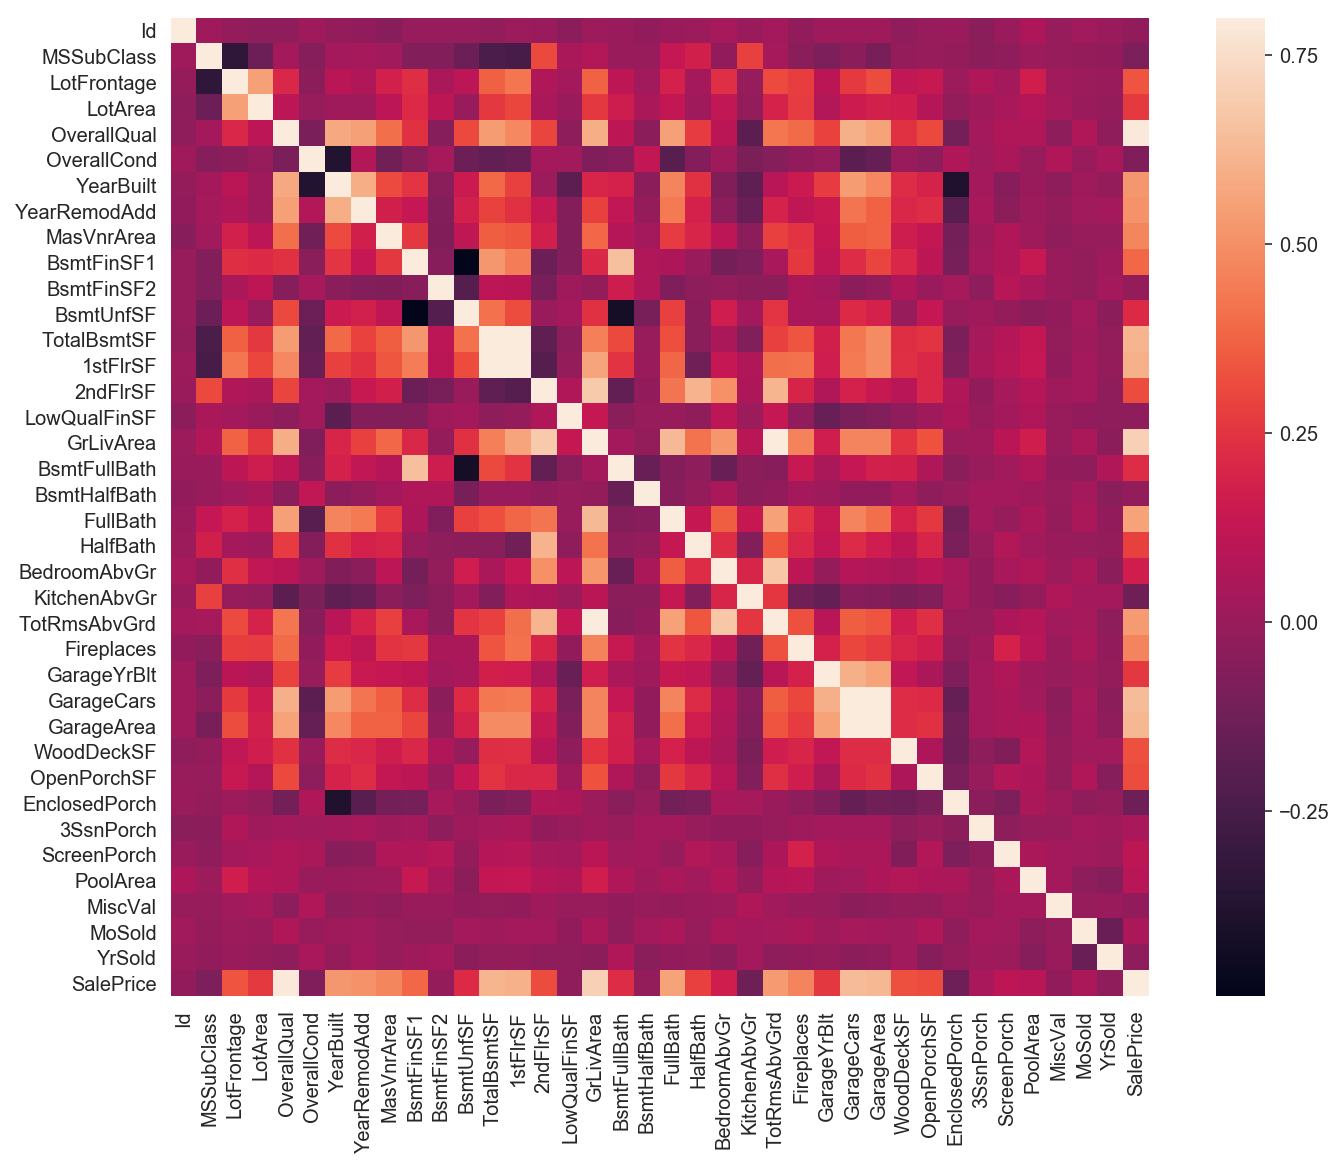

In [35]:
# looking at the correlation between features
# Correlation Matrix Heatmap
corrhouse = house.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrhouse, vmax=.8, square=True);

Looking at the top 12 highly correlated features with the Sale Price.
They are;   
1. OverallQual - 'Rates the overall material and finish of the house' - condition from 10 (v.excellent) to 1 (v.poor)
2. YearBuilt -  'Original construction date'
3. YearRemodAdd - 'Remodel date (same as construction date if no remodeling or additions)' 
4. MasVnrArea -  'Masonry veneer type'
5. TotalBsmtSF - 'Total square feet of basement area' 
6. 1stFlrSF - 'First Floor square feet'
7. GrLivArea - 'Above grade (ground) living area square feet' 
8. FullBath - 'Full bathrooms above grade'
9. TotRmsAbvGrd - 'Total rooms above grade' 
10. Fireplaces - 'Number of fireplaces' 
11. GarageCars - 'Size of garage in car capacity' 
12. GarageArea - 'Size of garage in square feet'

Generally, it looks like the overall quality and finishing, tops in terms of correlation to sale price, followed by size of the house, garage, number of above grade rooms and as well as other important features like fireplace, full bathroom and basement. One last important feature to look at is if the house has been remodelled since it is first built.

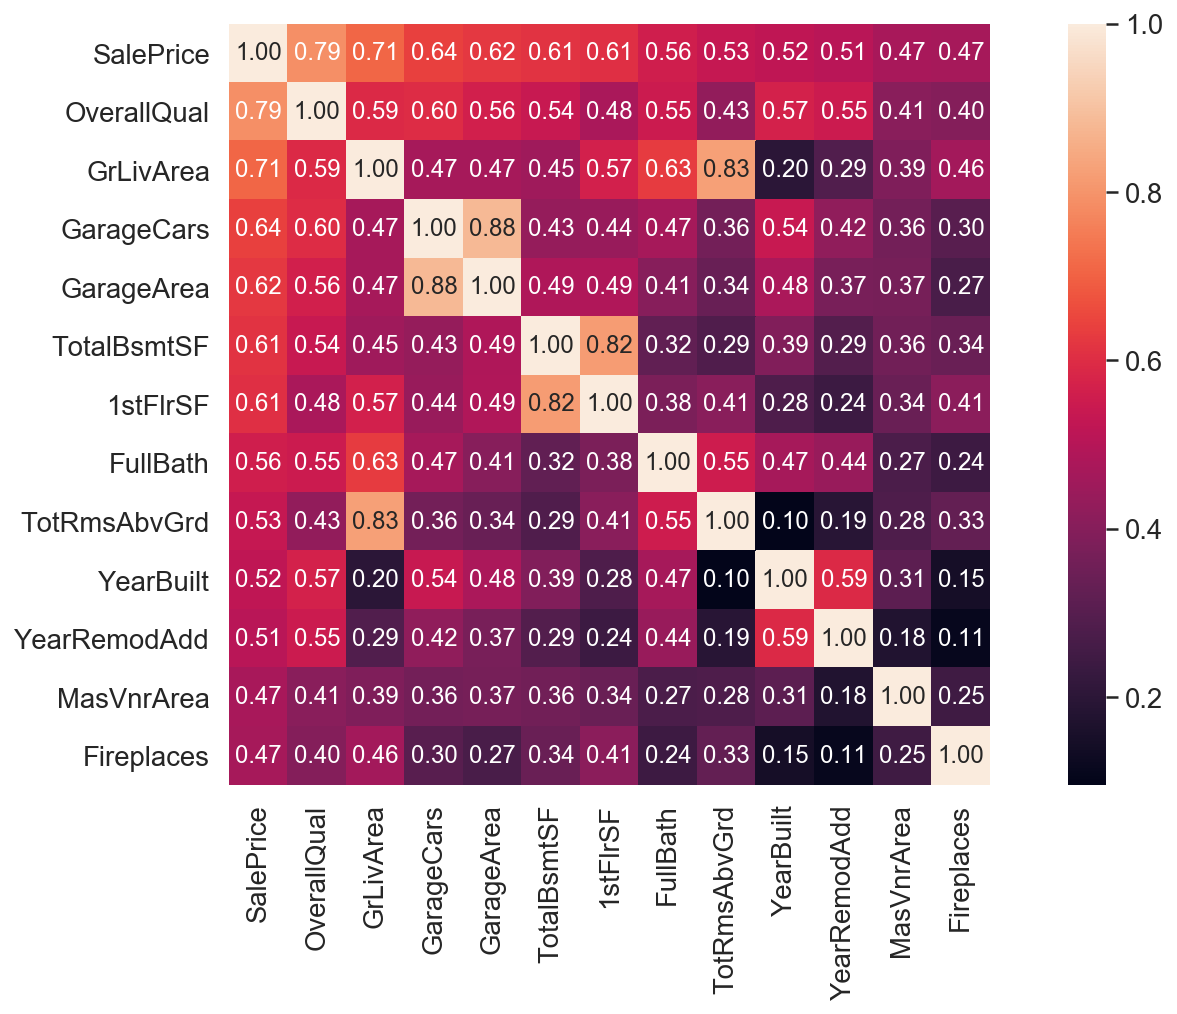

In [36]:
# Top 12 Heatmap
plt.figure(figsize=(14,7))

k = 13 #number of variables for heatmap
cols = corrhouse.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- Looks like MasVnrArea - 'Masonry veneer type' and fire places with less than 0.5 may be dropped later
- Garage Area may be drop as well as it is highly correlated to Garage Cars.
- 'First Floor square feet' (1stFlrSF) and 'Total rooms above grade' (TotRmsAbvGrd) seems to be highly correlated and will to be look into later.

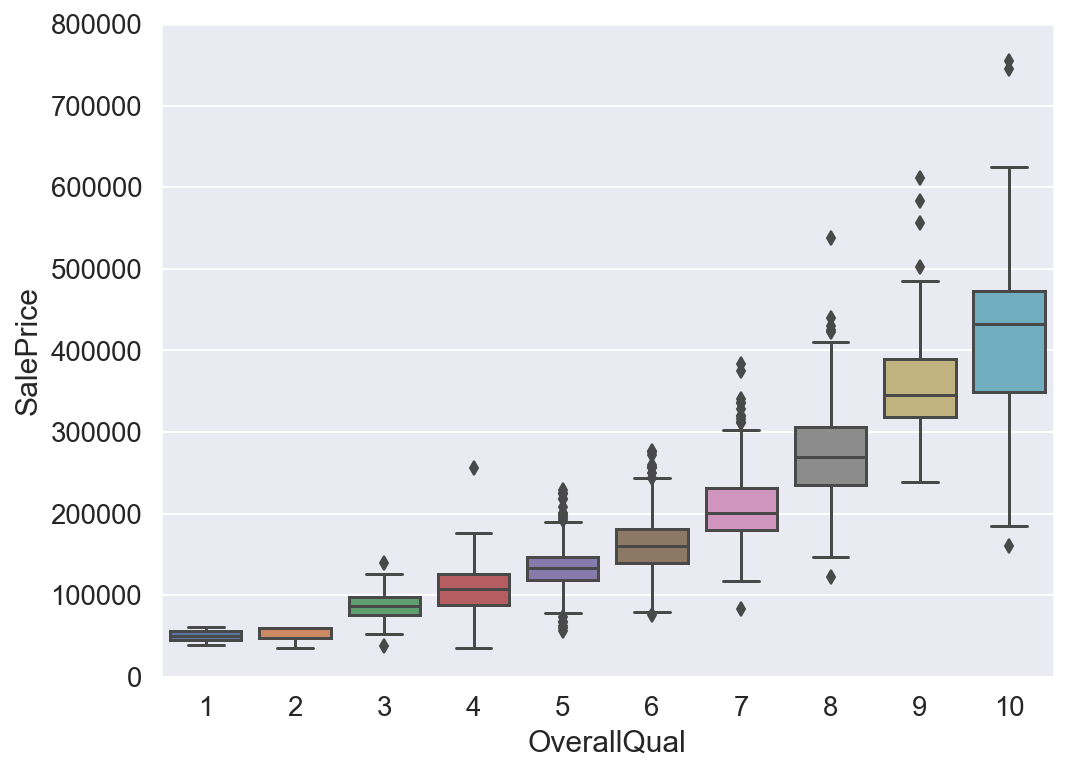

In [37]:
# Overall Quality vs Sale Price
var = 'OverallQual'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

This plot match a strong consistent of Overall Quality of the house increases linearly with the sale price

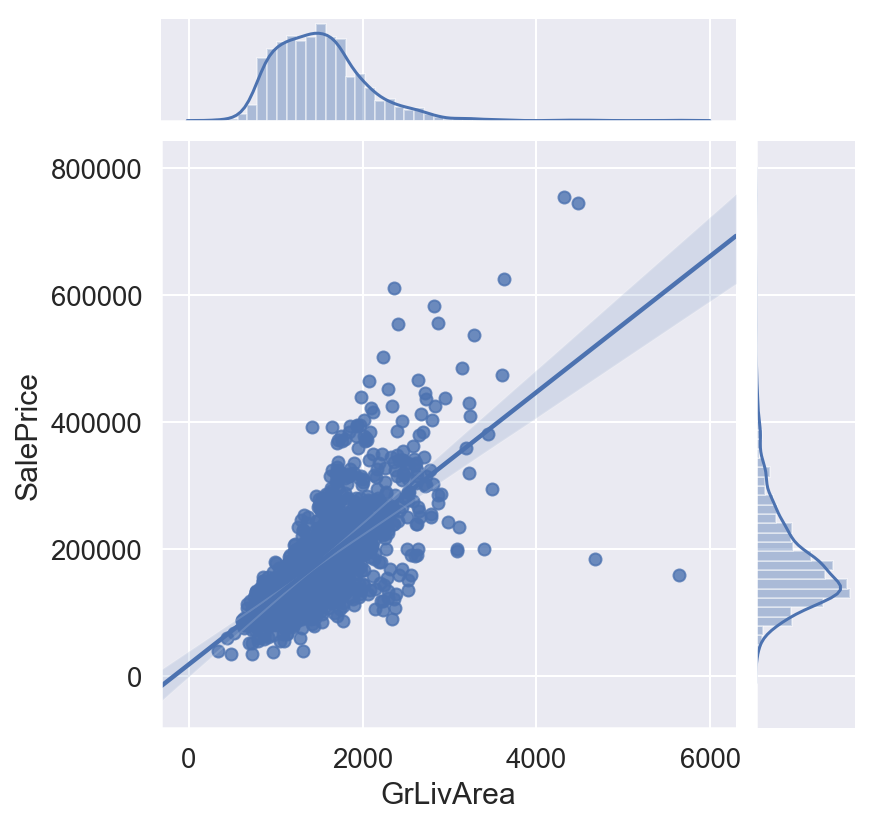

In [38]:
import warnings
warnings.filterwarnings('ignore')
# Living Area vs Sale Price
sns.jointplot(x=house['GrLivArea'], y=house['SalePrice'], kind='reg')
plt.show()

In [39]:
filter_GrLivArea = house.GrLivArea > 4000 
house[filter_GrLivArea]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,none,IR1,Bnk,AllPub,...,0,none,none,none,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,none,IR1,Lvl,AllPub,...,555,Ex,MnPrv,none,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,none,IR3,Bnk,AllPub,...,480,Gd,none,none,0,1,2008,New,Partial,160000


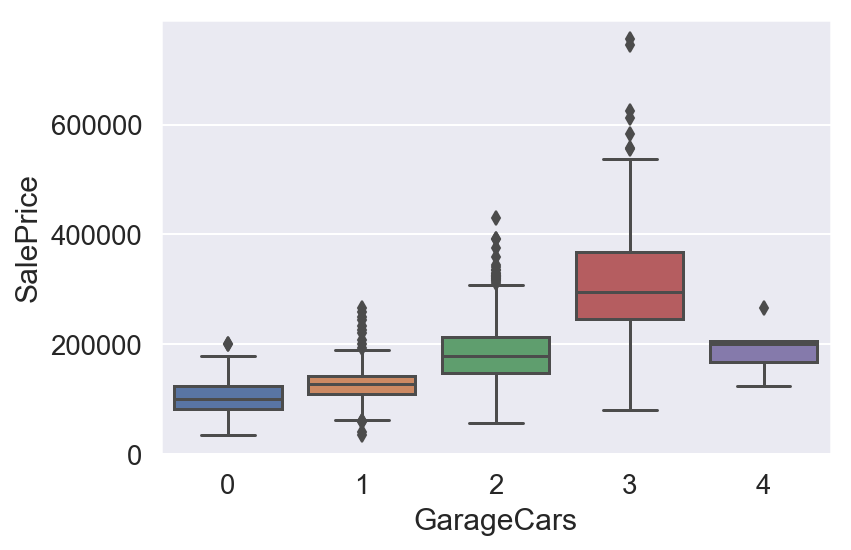

In [40]:
# Garage Area vs Sale Price
sns.boxplot(x=house['GarageCars'], y=house['SalePrice'])
plt.show()

In [41]:
filter_GarageCars = house.GarageCars == 4
house[filter_GarageCars]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
420,421,90,RM,78.000000,7060,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,11,2008,WD,Alloca,206300
747,748,70,RM,65.000000,11700,Pave,Pave,IR1,Lvl,AllPub,...,0,none,none,none,0,5,2009,WD,Normal,265979
1190,1191,190,RL,99.445188,32463,Pave,none,Reg,Low,AllPub,...,0,none,none,none,0,3,2007,WD,Normal,168000
1340,1341,20,RL,70.000000,8294,Pave,none,Reg,Lvl,AllPub,...,0,none,GdWo,none,0,6,2007,WD,Normal,123000
1350,1351,90,RL,91.000000,11643,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,8,2009,WD,Normal,200000


It looks like the rows with 4 'Garage Cars' have a comparatively small number of 5 when compare to others so it is hard to get a clear indication with such a small number.
Another guess it could be after 3 cars, it doesn't matter if the garage can fit 4 cars as the average household in IOWA is 1.70 cars. A larger garage will also occupy lot size that can be used for other things on the property and affect usage. So therefore, garage cars with 4 will be treated as outliers as it no longer shows a good indication of sale price. Therefore will be dropping these 4 rows.
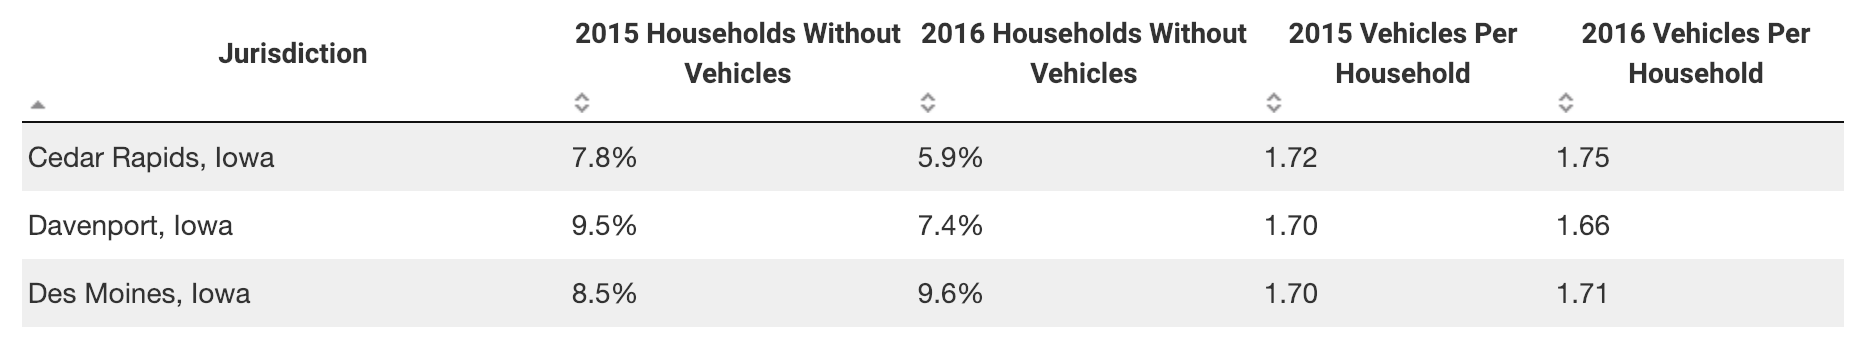
http://www.governing.com/gov-data/car-ownership-numbers-of-vehicles-by-city-map.html

In [42]:
house_v1 = house.drop(house[(house['GarageCars']>3)].index).reset_index(drop=True)

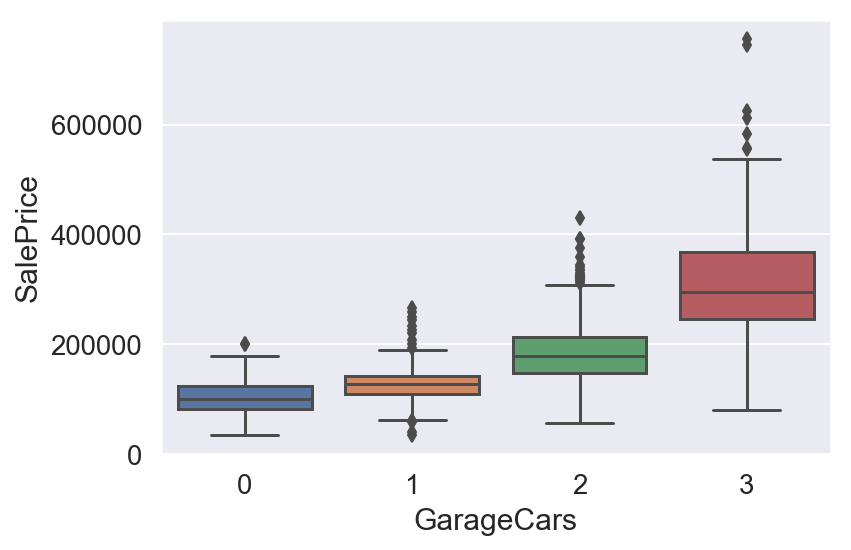

In [43]:
sns.boxplot(x=house_v1['GarageCars'], y=house_v1['SalePrice'])
plt.show()

Drop Garage Cars 4 rows

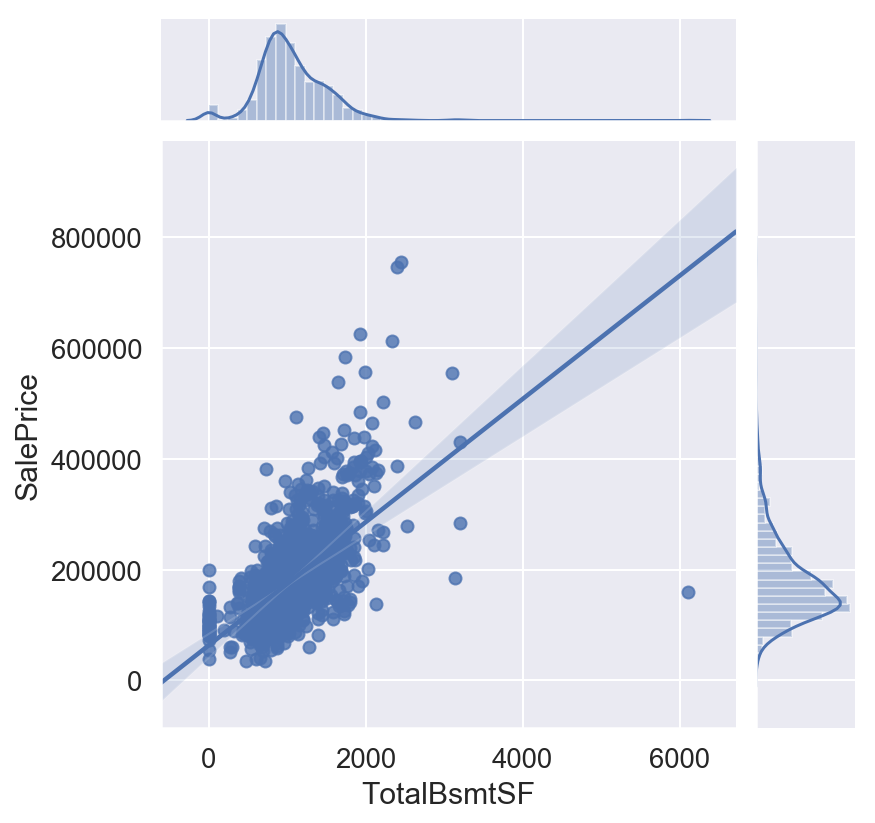

In [44]:
sns.jointplot(x=house_v1['TotalBsmtSF'], y=house_v1['SalePrice'], kind='reg')
plt.show()

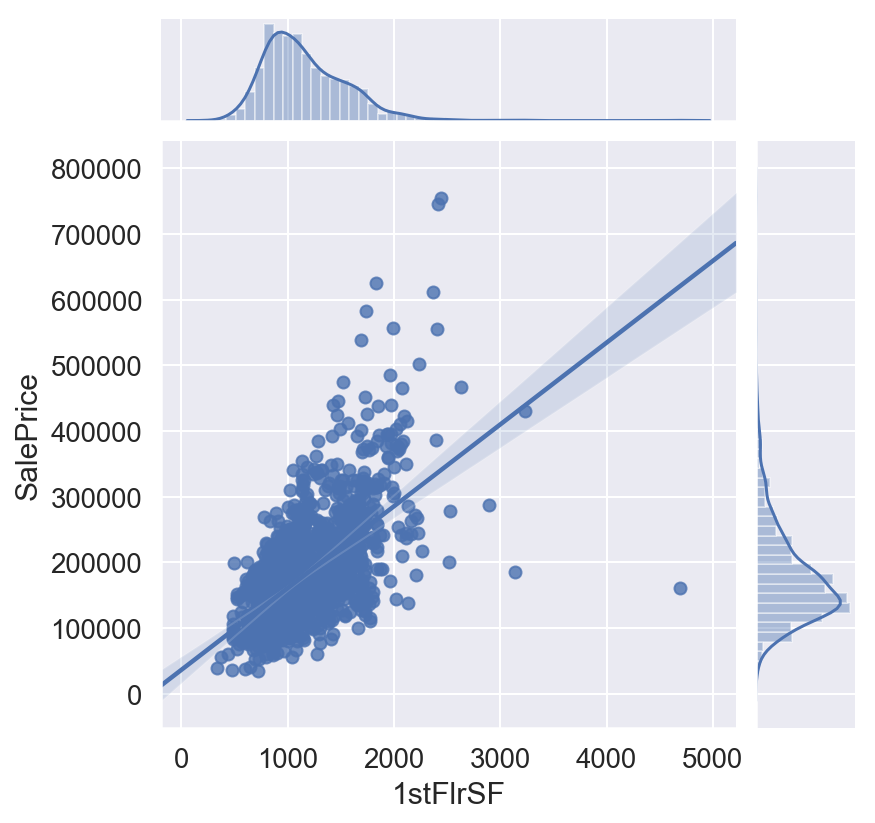

In [45]:
sns.jointplot(x=house_v1['1stFlrSF'], y=house_v1['SalePrice'], kind='reg')
plt.show()

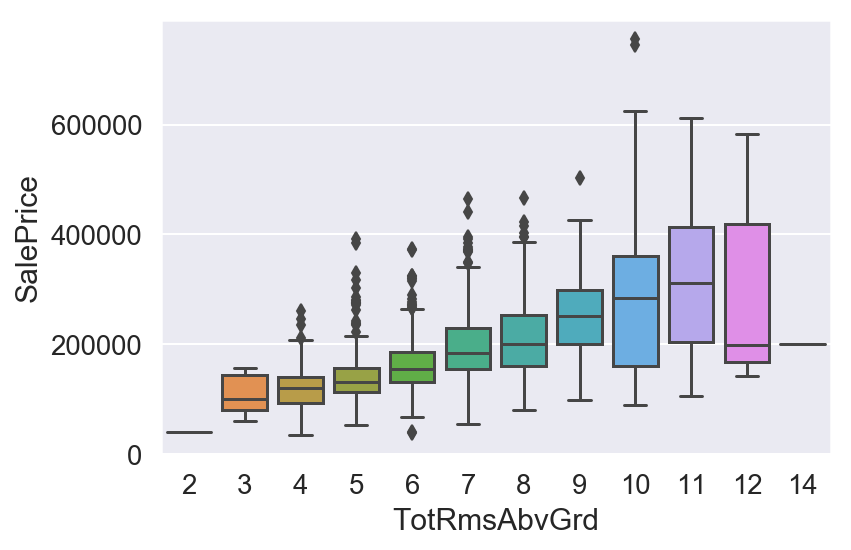

In [46]:
sns.boxplot(x=house_v1['TotRmsAbvGrd'], y=house_v1['SalePrice'])
plt.show()

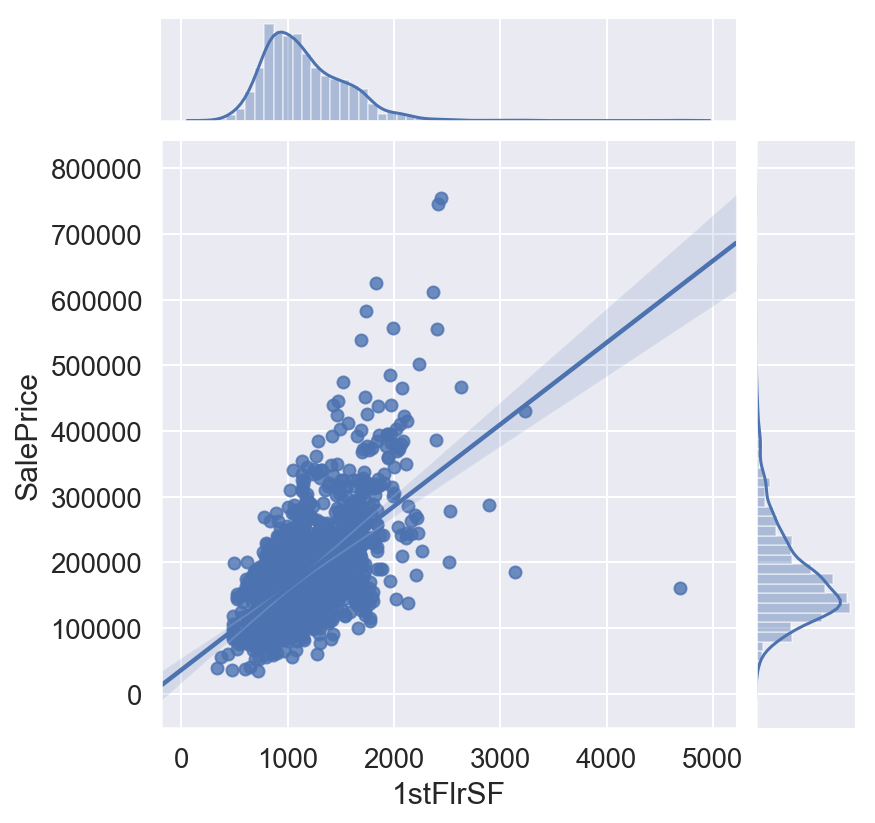

In [47]:
sns.jointplot(x=house_v1['1stFlrSF'], y=house_v1['SalePrice'], kind='reg')
plt.show()

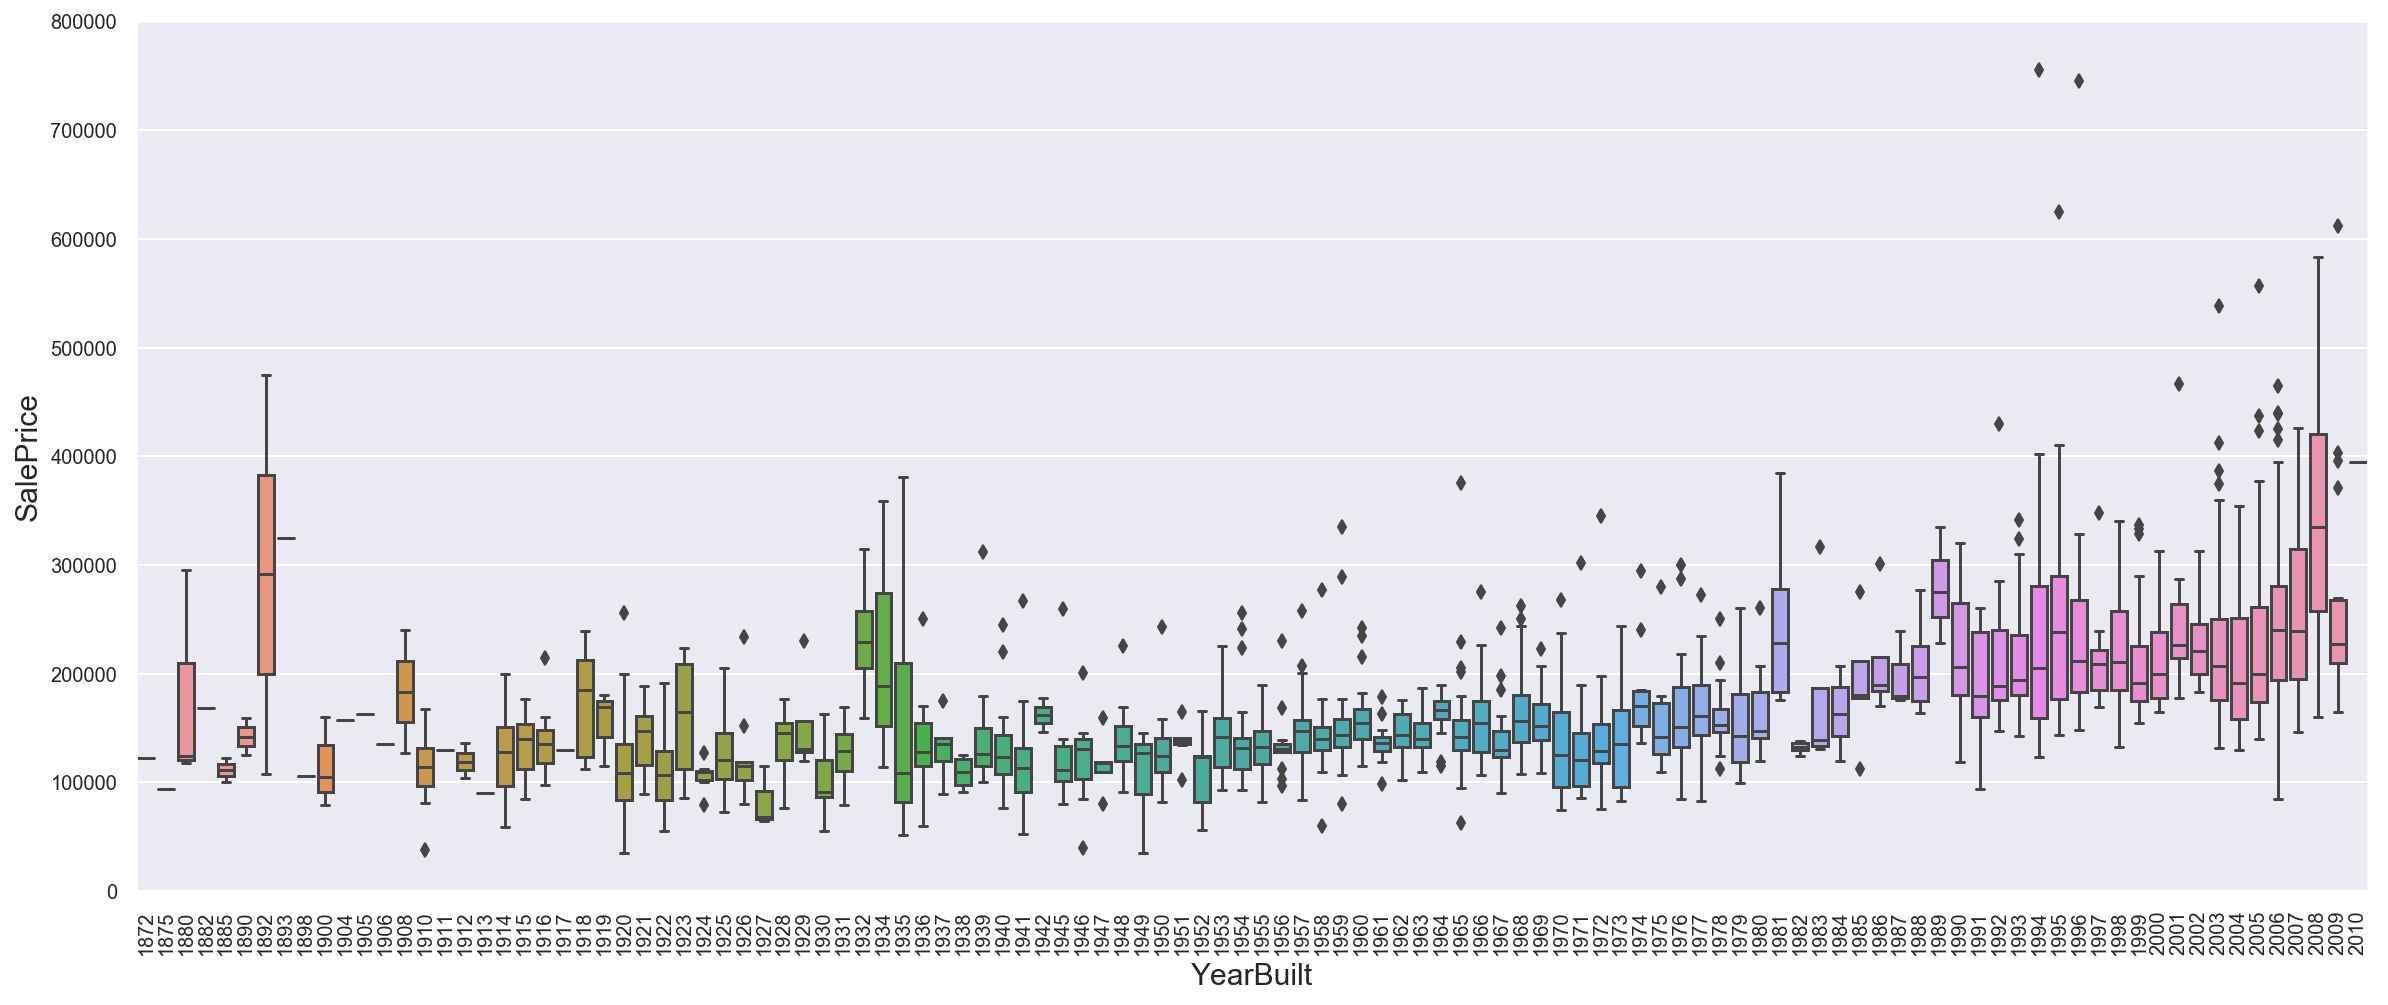

In [48]:
# Total Rooms vs Sale Price
var = 'YearBuilt'
data = pd.concat([house_v1['SalePrice'], house_v1[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);
ax.tick_params(labelsize=10)

There is a general trend of price of houses is lesser for older houses.



From EDA, the data shows great linearity with Sale Price and therefore the direction is to start with
linear regression and build the model based on linear regression. There are outliers but we will ignor this for now.

# Onto feature engineering and convert all object column to integer and then identify which x that can predict price.

Separating features between fix and renovate-able.

Examples of fix features;
* The neighborhood
* Square feet
* Bedrooms, bathrooms
* Basement and garage space

Some examples of things that ARE renovate-able
* Roof and exterior features
* "Quality" metrics, such as kitchen quality
* "Condition" metrics, such as condition of garage
* Heating and electrical components

In [49]:
fix_features = ['MSSubClass', 
                'MSZoning',
                'LotFrontage',
                'LotArea',
                'Street',
                'Alley',
                'LotShape',
                'LandContour'
                'LotConfig',
                'LandSlope',
                'Neighborhood',
                'Condition1',
                'Condition2',
                'BldgType',
                'HouseStyle',
                'YearBuilt',
                'Foundation',
                'BsmtQual',
                'BsmtExposure',
                'TotalBsmtSF',
                '1stFlrSF',
                '2ndFlrSF',
                'GrLivArea',
                'BsmtFullBath',
                'BsmtHalfBath',
                'Fireplaces',
                'GarageType',
                'GarageYrBlt',
                'GarageCars',
                'GarageArea',
                'WoodDeckSF',
                'OpenPorchSF',
                'EnclosedPorch',
                '3SsnPorch',
                'ScreenPorch',
                'PoolArea',
                'MiscFeature',
                'MiscVal',
                'MoSold',
                'YrSold',
                'SaleType',
                'SaleCondition']

In [50]:
reno_features = ['Utilities',
                 'OverallQual',
                 'OverallCond',
                 'YearRemodAdd',
                 'RoofStyle',
                 'RoofMatl',
                 'Exterior1st',
                 'Exterior2nd',
                 'MasVnrType',
                 'MasVnrArea',
                 'ExterQual',
                 'ExterCond',
                 'BsmtCond',
                 'BsmtFinType1',
                 'BsmtFinSF1',
                 'BsmtFinType2',
                 'BsmtFinSF2',
                 'BsmtUnfSF',
                 'Heating',
                 'HeatingQC',
                 'CentralAir',
                 'Electrical',
                 'LowQualFinSF',
                 'FullBath',
                 'HalfBath',
                 'Bedroom',
                 'Kitchen',
                 'KitchenQual',
                 'TotRmsAbvGrd',
                 'Functional',
                 'FireplaceQu',
                 'GarageFinish',
                 'GarageQual',
                 'GarageCond',
                 'PavedDrive',
                 'PoolQC',
                 'Fence',]

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       
MSSubClass is a integer variable that doesn't make sense with the numbers representing different various type of dwelling. So therefore these numbers are actually categorical and therefore will be convert to str before dummy variable.

In [51]:
#MSSubClass =The building class
house_v1['MSSubClass'] = house_v1['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
house_v1['OverallCond'] = house_v1['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
house_v1['YrSold'] = house_v1['YrSold'].astype(str)
house_v1['MoSold'] = house_v1['MoSold'].astype(str)


In [52]:
house_v1.select_dtypes(include=['object']).columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [53]:
cat_houses = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']

In [54]:
cat_dummy = pd.get_dummies(house_v1[cat_houses])
cat_dummy.head()

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [55]:
# create a dataframe of only column of numerical nature, to be combined later with
# categorical column that were converted to dummy variable
num_house = house_v1.select_dtypes(exclude = ["object"]).columns
num_house = num_house.drop("SalePrice")
df_num_house = house_v1[num_house]
df_num_house.shape

(1455, 33)

In [56]:
# Joining numerical and categorical dataframe
house_v2 = pd.concat([df_num_house, cat_dummy], axis = 1)
house_v2.shape

(1455, 336)

In [57]:
print(list(cat_dummy.columns.values))

['MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'Alley_none', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 

In [58]:
print(list(df_num_house.columns.values))

['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [59]:
fix_features_AD = ['MSSubClass_120',
'MSSubClass_160',
'MSSubClass_180',
'MSSubClass_190',
'MSSubClass_20',
'MSSubClass_30',
'MSSubClass_40',
'MSSubClass_45',
'MSSubClass_50',
'MSSubClass_60',
'MSSubClass_70',
'MSSubClass_75',
'MSSubClass_80',
'MSSubClass_85',
'MSSubClass_90',
'MSZoning_C (all)',
'MSZoning_FV',
'MSZoning_RH',
'MSZoning_RL',
'MSZoning_RM',
'LotFrontage',
'LotArea',
'Street_Grvl',
'Street_Pave',
'Alley_Grvl',
'Alley_Pave',
'Alley_none',
'LotShape_IR1',
'LotShape_IR2',
'LotShape_IR3',
'LotShape_Reg',
'LandContour_Bnk',
'LandContour_HLS',
'LandContour_Low',
'LandContour_Lvl',
'LotConfig_Corner',
'LotConfig_CulDSac',
'LotConfig_FR2',
'LotConfig_FR3',
'LotConfig_Inside',
'LandSlope_Gtl',
'LandSlope_Mod',
'LandSlope_Sev',
'Neighborhood_Blmngtn',
'Neighborhood_Blueste',
'Neighborhood_BrDale',
'Neighborhood_BrkSide',
'Neighborhood_ClearCr',
'Neighborhood_CollgCr',
'Neighborhood_Crawfor',
'Neighborhood_Edwards',
'Neighborhood_Gilbert',
'Neighborhood_IDOTRR',
'Neighborhood_MeadowV',
'Neighborhood_Mitchel',
'Neighborhood_NAmes',
'Neighborhood_NPkVill',
'Neighborhood_NWAmes',
'Neighborhood_NoRidge',
'Neighborhood_NridgHt',
'Neighborhood_OldTown',
'Neighborhood_SWISU',
'Neighborhood_Sawyer',
'Neighborhood_SawyerW',
'Neighborhood_Somerst',
'Neighborhood_StoneBr',
'Neighborhood_Timber',
'Neighborhood_Veenker',
'Condition1_Artery',
'Condition1_Feedr',
'Condition1_Norm',
'Condition1_PosA',
'Condition1_PosN',
'Condition1_RRAe',
'Condition1_RRAn',
'Condition1_RRNe',
'Condition1_RRNn',
'Condition2_Artery',
'Condition2_Feedr',
'Condition2_Norm',
'Condition2_PosA',
'Condition2_PosN',
'Condition2_RRAe',
'Condition2_RRAn',
'Condition2_RRNn',
'BldgType_1Fam',
'BldgType_2fmCon',
'BldgType_Duplex',
'BldgType_Twnhs',
'BldgType_TwnhsE',
'HouseStyle_1.5Fin',
'HouseStyle_1.5Unf',
'HouseStyle_1Story',
'HouseStyle_2.5Fin',
'HouseStyle_2.5Unf',
'HouseStyle_2Story',
'HouseStyle_SFoyer',
'HouseStyle_SLvl',
'YearBuilt',
'Foundation_BrkTil',
'Foundation_CBlock',
'Foundation_PConc',
'Foundation_Slab',
'Foundation_Stone',
'Foundation_Wood',
'BsmtQual_Ex',
'BsmtQual_Fa',
'BsmtQual_Gd',
'BsmtQual_TA',
'BsmtExposure_Av',
'BsmtExposure_Gd',
'BsmtExposure_Mn',
'BsmtExposure_No',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'Fireplaces',
'GarageType_2Types',
'GarageType_Attchd',
'GarageType_Basment',
'GarageType_BuiltIn',
'GarageType_CarPort',
'GarageType_Detchd',
'GarageType_none',
'GarageYrBlt',
'GarageCars',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscFeature_Gar2',
'MiscFeature_Othr',
'MiscFeature_Shed',
'MiscFeature_TenC',
'MiscFeature_none',
'MiscVal',
'MoSold_1',
'MoSold_10',
'MoSold_11',
'MoSold_12',
'MoSold_2',
'MoSold_3',
'MoSold_4',
'MoSold_5',
'MoSold_6',
'MoSold_7',
'MoSold_8',
'MoSold_9',
'YrSold_2006',
'YrSold_2007',
'YrSold_2008',
'YrSold_2009',
'YrSold_2010',
'SaleType_COD',
'SaleType_CWD',
'SaleType_Con',
'SaleType_ConLD',
'SaleType_ConLI',
'SaleType_ConLw',
'SaleType_New',
'SaleType_Oth',
'SaleType_WD',
'SaleCondition_Abnorml',
'SaleCondition_AdjLand',
'SaleCondition_Alloca',
'SaleCondition_Family',
'SaleCondition_Normal',
'SaleCondition_Partial']


In [60]:
reno_features_AD = ['Utilities_AllPub'
'Utilities_NoSeWa'
'OverallQual'
'OverallCond_1'
'OverallCond_2'
'OverallCond_3'
'OverallCond_4'
'OverallCond_5'
'OverallCond_6'
'OverallCond_7'
'OverallCond_8'
'OverallCond_9'
'YearRemodAdd'
'RoofStyle_Flat'
'RoofStyle_Gable'
'RoofStyle_Gambrel'
'RoofStyle_Hip'
'RoofStyle_Mansard'
'RoofStyle_Shed'
'RoofMatl_ClyTile'
'RoofMatl_CompShg'
'RoofMatl_Membran'
'RoofMatl_Metal'
'RoofMatl_Roll'
'RoofMatl_Tar&Grv'
'RoofMatl_WdShake'
'RoofMatl_WdShngl'
'Exterior1st_AsbShng'
'Exterior1st_AsphShn'
'Exterior1st_BrkComm'
'Exterior1st_BrkFace'
'Exterior1st_CBlock'
'Exterior1st_CemntBd'
'Exterior1st_HdBoard'
'Exterior1st_ImStucc'
'Exterior1st_MetalSd'
'Exterior1st_Plywood'
'Exterior1st_Stone'
'Exterior1st_Stucco'
'Exterior1st_VinylSd'
'Exterior1st_Wd Sdng'
'Exterior1st_WdShing'
'Exterior2nd_AsbShng'
'Exterior2nd_AsphShn'
'Exterior2nd_Brk Cmn'
'Exterior2nd_BrkFace'
'Exterior2nd_CBlock'
'Exterior2nd_CmentBd'
'Exterior2nd_HdBoard'
'Exterior2nd_ImStucc'
'Exterior2nd_MetalSd'
'Exterior2nd_Other'
'Exterior2nd_Plywood'
'Exterior2nd_Stone'
'Exterior2nd_Stucco'
'Exterior2nd_VinylSd'
'Exterior2nd_Wd Sdng'
'Exterior2nd_Wd Shng'
'MasVnrType_BrkCmn'
'MasVnrType_BrkFace'
'MasVnrType_None'
'MasVnrType_Stone'
'MasVnrType_none'
'MasVnrArea'
'ExterQual_Ex'
'ExterQual_Fa'
'ExterQual_Gd'
'ExterQual_TA'
'ExterCond_Ex'
'ExterCond_Fa'
'ExterCond_Gd'
'ExterCond_Po'
'ExterCond_TA'
'BsmtCond_Fa'
'BsmtCond_Gd'
'BsmtCond_Po'
'BsmtCond_TA'
'BsmtFinType1_ALQ'
'BsmtFinType1_BLQ'
'BsmtFinType1_GLQ'
'BsmtFinType1_LwQ'
'BsmtFinType1_Rec'
'BsmtFinType1_Unf'
'BsmtFinType2_ALQ'
'BsmtFinType2_BLQ'
'BsmtFinType2_GLQ'
'BsmtFinType2_LwQ'
'BsmtFinType2_Rec'
'BsmtFinType2_Unf'
'BsmtFinSF1'
'BsmtFinSF2'
'BsmtUnfSF'
'Heating_Floor'
'Heating_GasA'
'Heating_GasW'
'Heating_Grav'
'Heating_OthW'
'Heating_Wall'
'HeatingQC_Ex'
'HeatingQC_Fa'
'HeatingQC_Gd'
'HeatingQC_Po'
'HeatingQC_TA'
'CentralAir_N'
'CentralAir_Y'
'Electrical_FuseA'
'Electrical_FuseF'
'Electrical_FuseP'
'Electrical_Mix'
'Electrical_SBrkr'
'LowQualFinSF'
'FullBath'
'HalfBath'
'BedroomAbvGr'
'KitchenAbvGr'
'KitchenQual_Ex'
'KitchenQual_Fa'
'KitchenQual_Gd'
'KitchenQual_TA'
'TotRmsAbvGrd'
'Functional_Maj1'
'Functional_Maj2'
'Functional_Min1'
'Functional_Min2'
'Functional_Mod'
'Functional_Sev'
'Functional_Typ'
'FireplaceQu_Ex'
'FireplaceQu_Fa'
'FireplaceQu_Gd'
'FireplaceQu_Po'
'FireplaceQu_TA'
'FireplaceQu_none'
'GarageFinish_Fin'
'GarageFinish_RFn'
'GarageFinish_Unf'
'GarageFinish_none'
'GarageQual_Ex'
'GarageQual_Fa'
'GarageQual_Gd'
'GarageQual_Po'
'GarageQual_TA'
'GarageQual_none'
'GarageCond_Ex'
'GarageCond_Fa'
'GarageCond_Gd'
'GarageCond_Po'
'GarageCond_TA'
'GarageCond_none'
'PavedDrive_N'
'PavedDrive_P'
'PavedDrive_Y'
'PoolQC_Ex'
'PoolQC_Fa'
'PoolQC_Gd'
'PoolQC_none'
'Fence_GdPrv'
'Fence_GdWo'
'Fence_MnPrv'
'Fence_MnWw'
'Fence_none']

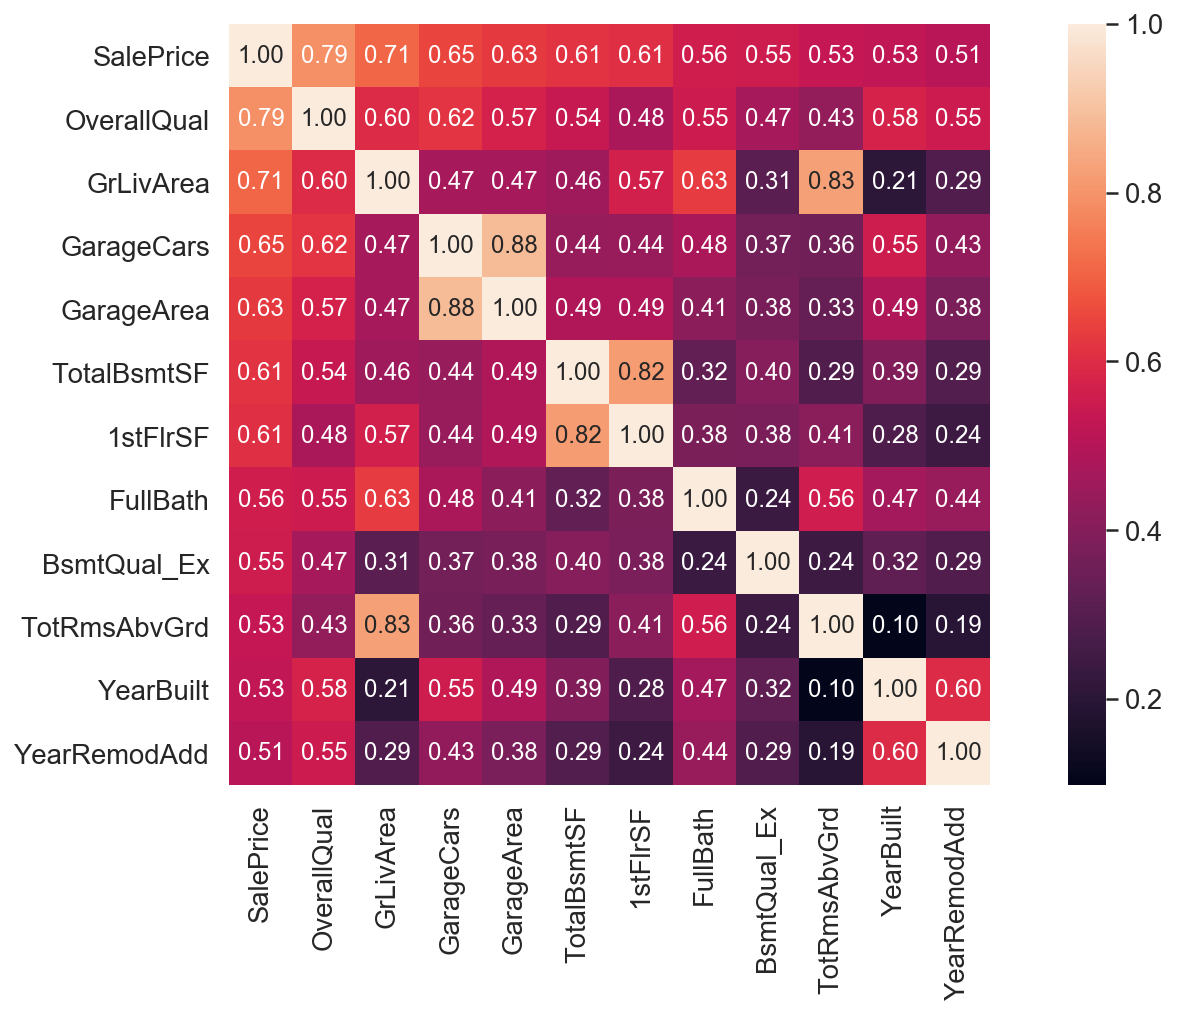

In [61]:
house_v3 = house_v2
house_v3['SalePrice'] = house_v1['SalePrice']
corrhoused = house_v3.corr()

# Top 10 Heatmap
plt.figure(figsize=(14,7))

kd = 12 #number of variables for heatmap
colsd = corrhoused.nlargest(kd, 'SalePrice')['SalePrice'].index
cmd = np.corrcoef(house_v3[colsd].values.T)
sns.set(font_scale=1.25)
hmd = sns.heatmap(cmd, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, 
                 yticklabels=colsd.values, xticklabels=colsd.values)
plt.show()

In [62]:
house_v3.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,65.0,8450,7,2003,2003,196.0,706,0,150,...,0,0,1,0,0,0,0,1,0,208500
1,2,80.0,9600,6,1976,1976,0.0,978,0,284,...,0,0,1,0,0,0,0,1,0,181500
2,3,68.0,11250,7,2001,2002,162.0,486,0,434,...,0,0,1,0,0,0,0,1,0,223500
3,4,60.0,9550,7,1915,1970,0.0,216,0,540,...,0,0,1,1,0,0,0,0,0,140000
4,5,84.0,14260,8,2000,2000,350.0,655,0,490,...,0,0,1,0,0,0,0,1,0,250000


In [63]:
# MLR model predicting price
import statsmodels.api as sm

# Setting my X and y for modeling
X = house_v3[fix_features_AD]
y = house_v3['SalePrice']

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()

y_pred = model.predict(X)

In [64]:
house_v3['y_pred'] = y_pred
house_v3['Residuals'] = house_v3['SalePrice'] - house_v3['y_pred']

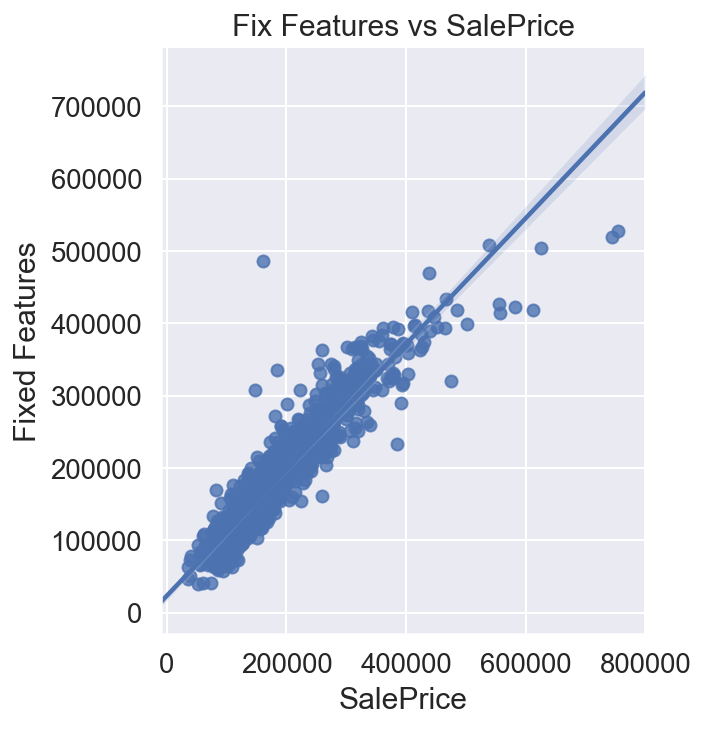

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot(x='SalePrice', y='y_pred', data=house_v3)
plt.xlabel('SalePrice')
plt.ylabel('Fixed Features')
plt.title('Fix Features vs SalePrice')

plt.show()

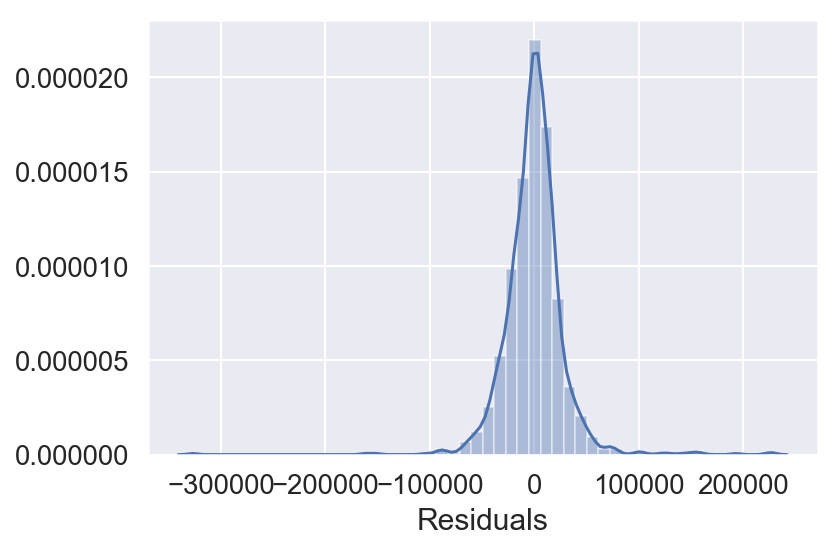

In [66]:
sns.distplot(house_v3['Residuals'])
plt.show()

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     56.80
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        05:08:26   Log-Likelihood:                -16999.
No. Observations:                1455   AIC:                         3.431e+04
Df Residuals:                    1301   BIC:                         3.512e+04
Df Model:                         153                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass_120        -2.839e+04   1.65e+04     -1.720      0.086   -6.08e+04    3984.364
MSSubClass_160        -4.174e+04   1.86e+04     -2.247      0.025   -7.82e+04   -5290.213
MSSubClass_180        -3.627e+04   2.13e+04     -1.701      0.089   -7.81e+04    5564.972
MSSubClass_190        -1.422e+04   3.14e+04     -0.453      0.650   -7.57e+04    4.73e+04
MSSubClass_20         -5543.9265   8477.238     -0.654      0.513   -2.22e+04    1.11e+04
MSSubClass_30         -5388.5894   9048.413     -0.596      0.552   -2.31e+04    1.24e+04
MSSubClass_40          1.159e+04   1.86e+04      0.622      0.534    -2.5e+04    4.82e+04
MSSubClass_45         -9749.7544   2.66e+04     -0.367      0.714   -6.19e+04    4.24e+04
MSSubClass_50         -8485.2914   1.08e+04     -0.787      0.432   -2.96e+04    1.27e+04
MSSubClass_60         -1.995e+04   1.02e+04     -1.960      0.050   -3.99e+04      13.772
MSSubClass_70         -5463.4066   9363.013     -0.584      0.560   -2.38e+04    1.29e+04
MSSubClass_75         -1657.8329   1.71e+04     -0.097      0.923   -3.52e+04    3.19e+04
MSSubClass_80         -9989.9624   1.44e+04     -0.694      0.488   -3.82e+04    1.83e+04
MSSubClass_85         -2.483e+04   1.35e+04     -1.845      0.065   -5.12e+04    1577.899
MSSubClass_90          -3.78e+04   8639.939     -4.375      0.000   -5.47e+04   -2.08e+04
MSZoning_C (all)      -7.533e+04   1.46e+04     -5.142      0.000   -1.04e+05   -4.66e+04
MSZoning_FV           -3.395e+04   1.29e+04     -2.636      0.008   -5.92e+04   -8686.529
MSZoning_RH           -4.116e+04   1.29e+04     -3.180      0.002   -6.66e+04   -1.58e+04
MSZoning_RL           -4.091e+04   1.11e+04     -3.693      0.000   -6.26e+04   -1.92e+04
MSZoning_RM           -4.654e+04   1.18e+04     -3.954      0.000   -6.96e+04   -2.35e+04
LotFrontage            -207.8910     54.629     -3.806      0.000    -315.061    -100.721
LotArea                   0.7629      0.132      5.772      0.000       0.504       1.022
Street_Grvl           -1.326e+05   2.74e+04     -4.832      0.000   -1.86e+05   -7.88e+04
Street_Pave           -1.053e+05   2.68e+04     -3.928      0.000   -1.58e+05   -5.27e+04
Alley_Grvl            -8.054e+04   1.75e+04     -4.593      0.000   -1.15e+05   -4.61e+04
Alley_Pave            -7.941e+04    1.8e+04     -4.414      0.000   -1.15e+05   -4.41e+04
Alley_none            -7.794e+04   1.78e+04     -4.374      0.000   -1.13e+05    -4.3e+04
LotShape_IR1          -5.339e+04   1.33e+04     -4.003      0.000   -7.96e+04   -2.72e+04
LotShape_IR2          -4.242e+04   1.37e+04     -3.095      0.002   -6.93e+04   -1.55e+04
LotShape_IR3          -9.084e+04   1.57e+04     -5.785      0.000   -1.22e+05      -6e+04
LotShape_Reg          -5.124e+04   1.32e+04     -3.869      0.000   -7.72e+04   -2.53e+04
LandContour_Bnk       -

Tally with early EDA that the data show good linearity and MLR get really good R^2 value of 0.87. However, it also indicate strong multicollinearity problems. To improve this, we will be dropping features that show poor coefficient and test again.

# Test with just top 10 features highest correlinearity with SalePrice.

In [68]:
fix_features_top10corr = ['GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',
                          'FullBath','BsmtQual_Ex','TotRmsAbvGrd','YearBuilt','YearRemodAdd']

In [69]:
# MLR model predicting price
import statsmodels.api as sm

# Setting my X and y for modeling
X1 = house_v3[fix_features_top10corr]
y1 = house_v3['SalePrice']

# The Default here is Linear Regression (ordinary least squares regression OLS)
model1 = sm.OLS(y1,X1).fit()

y_pred1 = model1.predict(X1)

In [70]:
house_v3['y_pred1'] = y_pred1
house_v3['Residuals1'] = house_v3['SalePrice'] - house_v3['y_pred1']

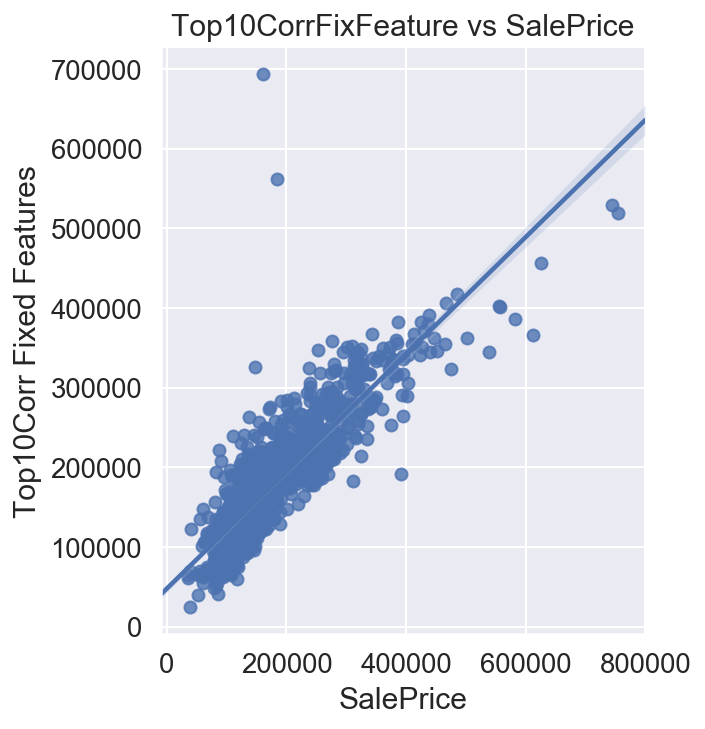

In [71]:
sns.lmplot(x='SalePrice', y='y_pred1', data=house_v3)
plt.xlabel('SalePrice')
plt.ylabel('Top10Corr Fixed Features')
plt.title('Top10CorrFixFeature vs SalePrice')

plt.show()

In [72]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     3264.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        05:08:30   Log-Likelihood:                -17507.
No. Observations:                1455   AIC:                         3.503e+04
Df Residuals:                    1445   BIC:                         3.509e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
GrLivArea       68.7499      4.367     15.743      0.000      60.184      77.316
GarageCars    2.614e+04   3281.305      7.966      0.000    1.97e+04    3.26e+04
GarageArea       1.2768     11.298      0.113      0.910     -20.885      23.439
TotalBsmtSF     38.7168      4.471      8.659      0.000      29.946      47.488
1stFlrSF        -6.7440      5.241     -1.287      0.198     -17.025       3.537
FullBath      1.083e+04   2692.479      4.024      0.000    5552.239    1.61e+04
BsmtQual_Ex   7.031e+04   4372.427     16.081      0.000    6.17e+04    7.89e+04
TotRmsAbvGrd -3950.2312   1197.929     -3.298      0.001   -6300.098   -1600.365
YearBuilt      121.3918     49.232      2.466      0.014      24.819     217.965
YearRemodAdd  -120.5042     48.607     -2.479      0.013    -215.852     -25.157
==============================================================================
Omnibus:                      724.124   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50399.765
Skew:                          -1.466   Prob(JB):                         0.00
Kurtosis:                      31.684   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Final trim down to 3 fixed features 
- GarageCars: Size of garage in car capacity
- BsmtQual_Ex: Evaluates the height of the basement with Excellent of (100+ inches)
- FullBath: Full bathrooms above grade

In [73]:
fix_features_corr_trim = ['GarageCars','BsmtQual_Ex','FullBath']

# 'GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',
# 'FullBath','BsmtQual_Ex','TotRmsAbvGrd','YearBuilt','YearRemodAdd']

In [74]:
X2 = house_v3[fix_features_corr_trim]
y2 = house_v3['SalePrice']

model2 = sm.OLS(y2,X2).fit()

y_pred2 = model2.predict(X2)

In [75]:
house_v3['y_pred2'] = y_pred2
house_v3['Residuals2'] = house_v3['SalePrice'] - house_v3['y_pred2']

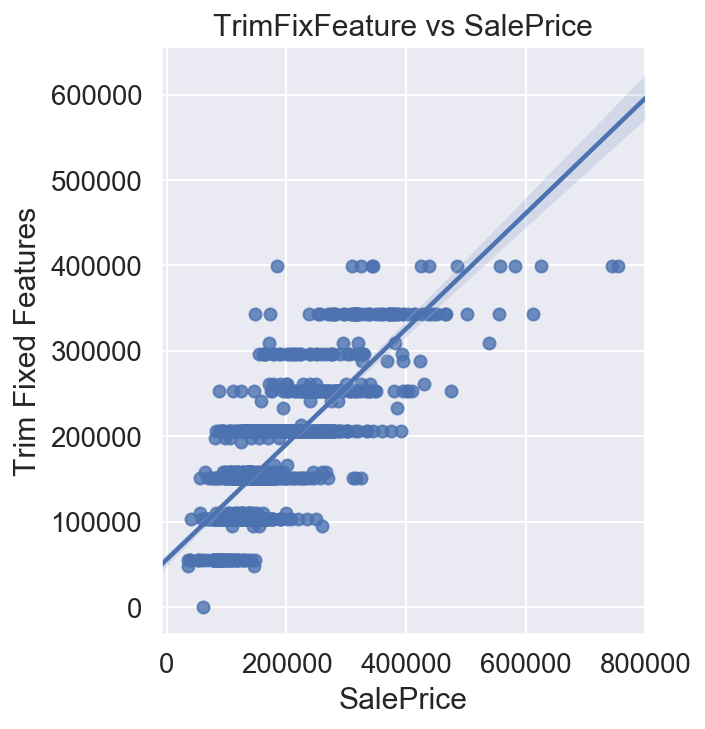

In [76]:
sns.lmplot(x='SalePrice', y='y_pred2', data=house_v3)
plt.xlabel('SalePrice')
plt.ylabel('Trim Fixed Features')
plt.title('TrimFixFeature vs SalePrice')

plt.show()

In [77]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     6784.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        05:08:32   Log-Likelihood:                -17836.
No. Observations:                1455   AIC:                         3.568e+04
Df Residuals:                    1452   BIC:                         3.569e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GarageCars   4.765e+04   1983.790     24.019      0.000    4.38e+04    5.15e+04
BsmtQual_Ex  9.009e+04   5080.871     17.732      0.000    8.01e+04       1e+05
FullBath     5.527e+04   2227.346     24.814      0.000    5.09e+04    5.96e+04
==============================================================================
Omnibus:                      289.488   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1670.561
Skew:                           0.796   Prob(JB):                         0.00
Kurtosis:                       8.002   Cond. No.                         9.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# R^2 = 0.933 with 3 fixed features to predict price using OLS
Good coefficient of the 3 features showing importance to the Sale Price

# Using Train/Test Validation Methods

In [78]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [79]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

X3 = house_v3[fix_features_top10corr]
y3 = house_v3['SalePrice']

In [80]:
# selection independent variables

# fix_features_corr_trim = ['GarageCars','BsmtQual_Ex','FullBath'] <-- best result with OLS

# 'GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',
# 'FullBath','BsmtQual_Ex','TotRmsAbvGrd','YearBuilt','YearRemodAdd'

# predictors
fix_features_predictors = ['GrLivArea','GarageCars','TotalBsmtSF',
                           'BsmtQual_Ex','YearBuilt','YearRemodAdd']

# create train and test sets (50/50)
X_train, X_test, y_train, y_test = train_test_split(X3[fix_features_predictors], 
                                                    y3, 
                                                    train_size=0.5, 
                                                    random_state=8)

In [81]:
# set model
lr = LinearRegression()
# fit model using train data
lr.fit(X_train, y_train)
# score the fit model using the test data.
lr.score(X_test, y_test)

0.7708131416454476

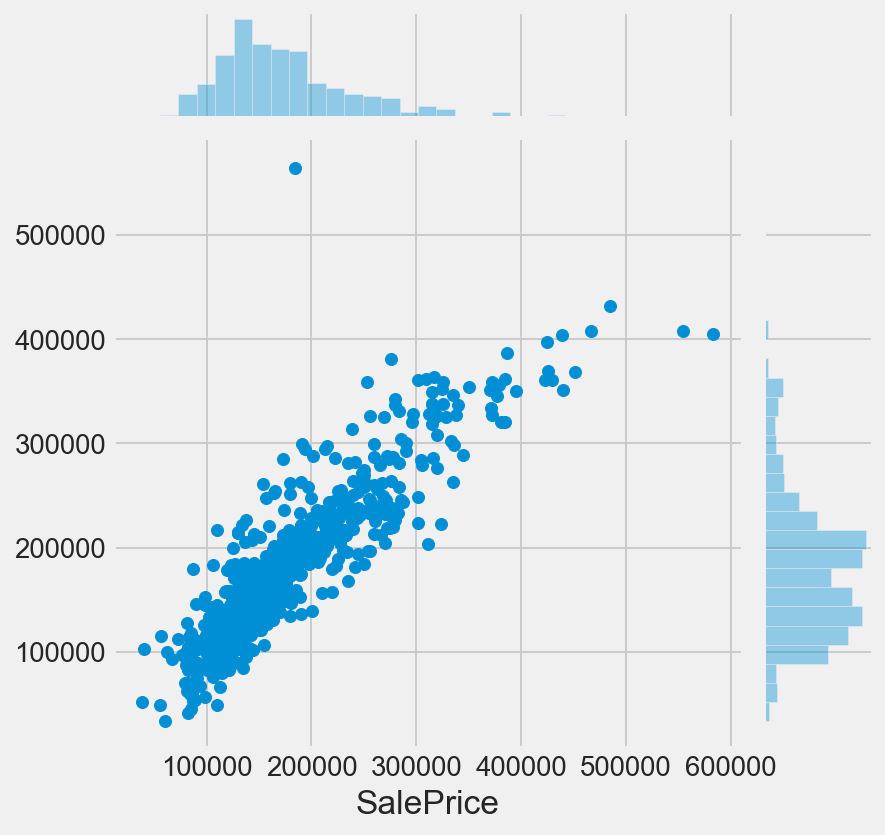

In [82]:
# plot y-true, vs. y-pred
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat)

In [83]:
# 60/40 Train/test Split

X_train, X_test, y_train, y_test = train_test_split(X3[fix_features_predictors], 
                                                    y3, 
                                                    train_size=0.7, 
                                                    random_state=8)

lr2 = LinearRegression()
# Fit the model
lr2.fit(X_train,y_train)
# Calculate R2 for the test set
lr2.score(X_test, y_test)

0.8043543707388958

After trying all combination, 90/10 to 10/90 and it looks like 70/30 gives the best score 0.8035

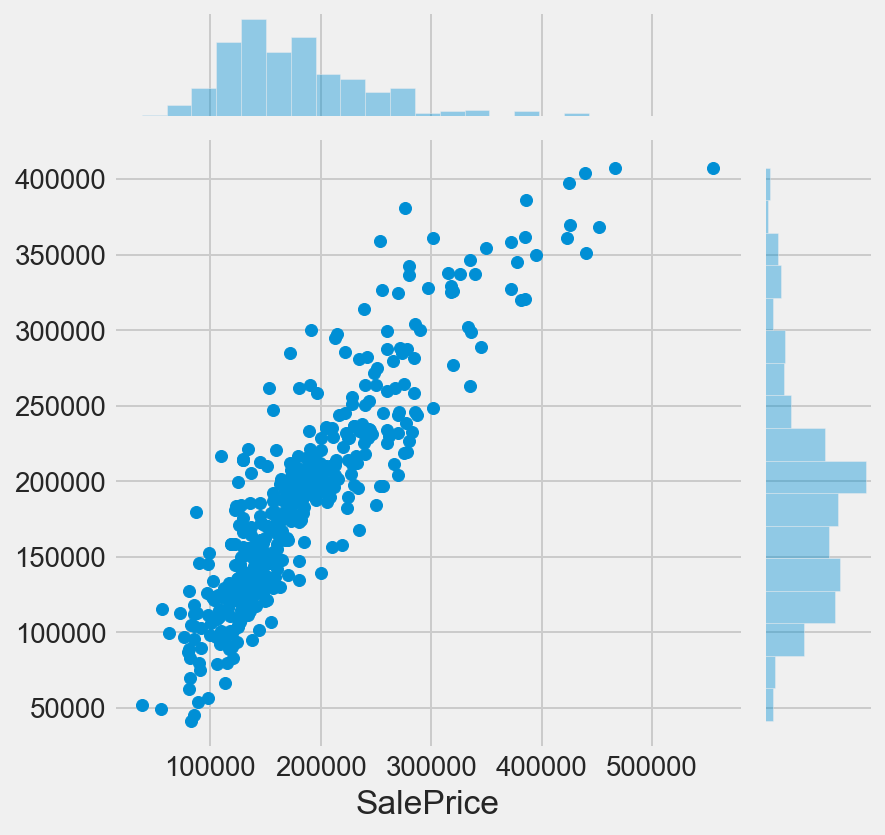

In [84]:
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

# looking only at renovate-able featues

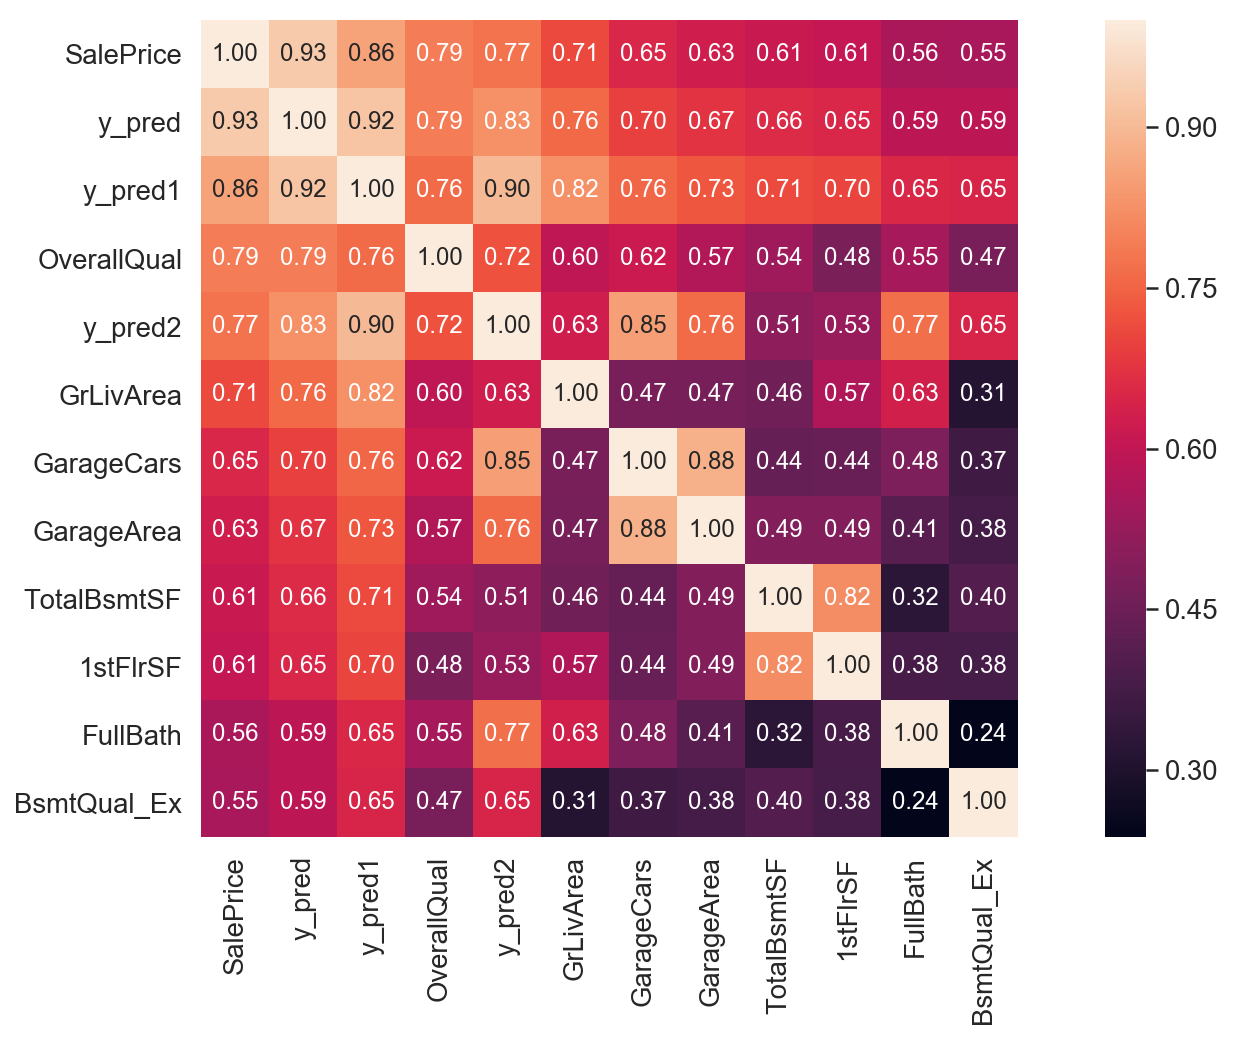

In [91]:
house_v4 = house_v2
house_v4.drop(columns=['Residuals','y_pred'])
house_v4['SalePrice'] = house_v1['SalePrice']
# house_v4.drop(columns=['y_pred','Residuals','y_pred1','Residuals1','y_pred2','Residuals2'])

corrhouse4 = house_v4.corr()


# Top 10 Heatmap
plt.figure(figsize=(14,7))

k4 = 12 #number of variables for heatmap
cols4 = corrhouse4.nlargest(k4, 'SalePrice')['SalePrice'].index
cm4 = np.corrcoef(house_v4[cols4].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm4, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, 
                 yticklabels=cols4.values, xticklabels=cols4.values)

In [86]:
house_v4.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,y_pred,Residuals,y_pred1,Residuals1,y_pred2,Residuals2
0,1,65.0,8450,7,2003,2003,196.0,706,0,150,...,0,1,0,208500,193684.584802,14815.415198,189750.903839,18749.096161,205839.205084,2660.794916
1,2,80.0,9600,6,1976,1976,0.0,978,0,284,...,0,1,0,181500,202819.508917,-21319.508917,179696.044607,1803.955393,205839.205084,-24339.205084
2,3,68.0,11250,7,2001,2002,162.0,486,0,434,...,0,1,0,223500,211599.317770,11900.682230,204876.944565,18623.055435,205839.205084,17660.794916
3,4,60.0,9550,7,1915,1970,0.0,216,0,540,...,0,0,0,140000,200632.668491,-60632.668491,198321.211133,-58321.211133,198218.104784,-58218.104784
4,5,84.0,14260,8,2000,2000,350.0,655,0,490,...,0,1,0,250000,302078.316073,-52078.316073,255094.084540,-5094.084540,253488.456205,-3488.456205


In [94]:
reno_features_corr= ['OverallQual']

In [95]:
X4 = house_v4[reno_features_corr]
y4 = house_v4['SalePrice']
model4 = sm.OLS(y4,X4).fit()
y_pred4 = model4.predict(X4)

In [97]:
house_v4['y_pred4'] = y_pred4
house_v4['Residuals4'] = house_v4['SalePrice'] - house_v4['y_pred4']

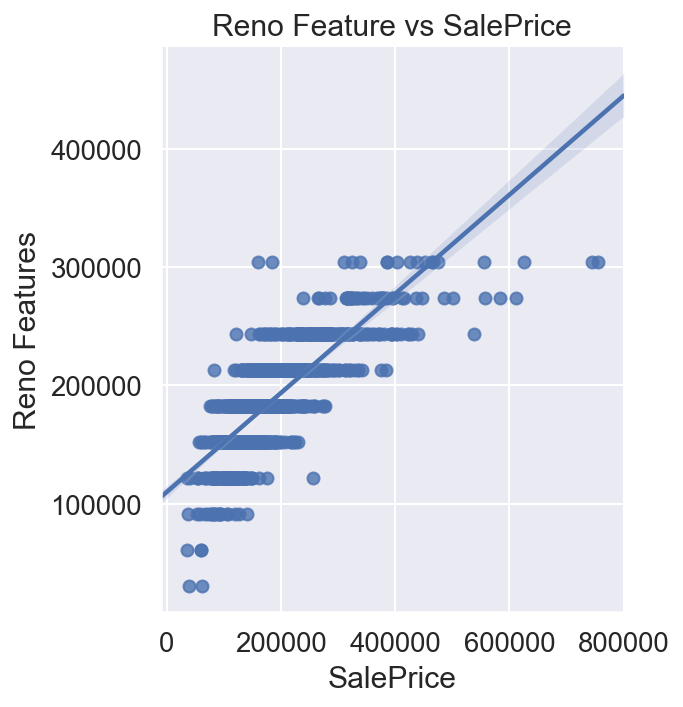

In [98]:
sns.lmplot(x='SalePrice', y='y_pred4', data=house_v4)
plt.xlabel('SalePrice')
plt.ylabel('Reno Features')
plt.title('Reno Feature vs SalePrice')
plt.show()

In [99]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     6784.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        05:20:34   Log-Likelihood:                -17836.
No. Observations:                1455   AIC:                         3.568e+04
Df Residuals:                    1452   BIC:                         3.569e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GarageCars   4.765e+04   1983.790     24.019      0.000    4.38e+04    5.15e+04
BsmtQual_Ex  9.009e+04   5080.871     17.732      0.000    8.01e+04       1e+05
FullBath     5.527e+04   2227.346     24.814      0.000    5.09e+04    5.96e+04
==============================================================================
Omnibus:                      289.488   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1670.561
Skew:                           0.796   Prob(JB):                         0.00
Kurtosis:                       8.002   Cond. No.                         9.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [ ]:
# A: